In [1]:
from konlpy.tag import Okt
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
import warnings
from nltk.corpus import stopwords

warnings.filterwarnings(action='ignore')

In [2]:
title='roblox.csv'
word_list =set(['이','와우','여러가지','로만','해주','진심','제일','화이팅','인정','록스','앞','짜증','굿굿','서요','머','마','한마디','어','은','디','머','삼','앱','폰','게임','겜','개','저','요','제발','뭐','하나','그냥','해','데','못','때문','그것','게','지금','내','걸','나','위','로','캐','이안','고','처럼','밑','스','방금','제','다시','왜','안','갑자기','처음','전','줄','한번','오늘','아예','해도','원래','번','만','하라','때','그거','심해','가끔','피하','하나요','욤','튕기','뭘','약간','렉좀','인','옆','것','그','또','꼭','명','건','부분','자주','글','수가','분','곳','경우','바로','자꾸','용','여','터','오','튕겨','어쩌','더','수','조금','짱','음','등','해주시','함','등등','찍','일단','자기','생기','일리','후','뒤','이번','이후','가기','중이','오지','땜','응','장공','보고','너','듯','세','배','무엇','게속','안나','그레','전혀','다가','놀수','정말','별로','굿','벌','색','제패','토','새','쫌','염','것좀','강추','멩','정도','번','기','거의','살','달','좀','거','진짜','저기','밌','이나','주','안눌려','재','완전','최고','이건','임','애','막','슴','개도','주기도','여기','무','영','고요','니','영','아주','생각','생','맘','구','산','버','화가','혐기','주시','물','피','다른','리지','계속','무슨','잘못','뭔가','실망','욤','난','답','일이','자체','끼리','다음','습','계속','가요','보','최악','잠깐','이상','몇번','며칠','어디','가지','직접','눈','업','날','끝','뎅','하니','혹시','건가','네','요즘','도','를','이제','좋더','얼마','언제','대박','거기','된거','그대로','주심','예전','제대로','분명','시','로블록스', '꿀잼','핵꿀잼','님들','짱짱','노잼','개꿀','역시','여러분','점','님','님들','꾸르잼','셈','밋','재밋어','안해','살짝','전부','블록','처','바','가안','레','티','튕','런','쿤'])
word_list

{'가기',
 '가끔',
 '가안',
 '가요',
 '가지',
 '갑자기',
 '강추',
 '개',
 '개꿀',
 '개도',
 '거',
 '거기',
 '거의',
 '건',
 '건가',
 '걸',
 '것',
 '것좀',
 '게',
 '게속',
 '게임',
 '겜',
 '경우',
 '계속',
 '고',
 '고요',
 '곳',
 '구',
 '굿',
 '굿굿',
 '그',
 '그거',
 '그것',
 '그냥',
 '그대로',
 '그레',
 '글',
 '기',
 '꼭',
 '꾸르잼',
 '꿀잼',
 '끝',
 '끼리',
 '나',
 '난',
 '날',
 '내',
 '너',
 '네',
 '노잼',
 '놀수',
 '눈',
 '니',
 '님',
 '님들',
 '다가',
 '다른',
 '다시',
 '다음',
 '달',
 '답',
 '대박',
 '더',
 '데',
 '뎅',
 '도',
 '된거',
 '뒤',
 '듯',
 '등',
 '등등',
 '디',
 '때',
 '때문',
 '땜',
 '또',
 '런',
 '레',
 '렉좀',
 '로',
 '로만',
 '로블록스',
 '록스',
 '를',
 '리지',
 '마',
 '막',
 '만',
 '맘',
 '머',
 '멩',
 '며칠',
 '명',
 '몇번',
 '못',
 '무',
 '무슨',
 '무엇',
 '물',
 '뭐',
 '뭔가',
 '뭘',
 '밋',
 '밌',
 '밑',
 '바',
 '바로',
 '방금',
 '배',
 '버',
 '번',
 '벌',
 '별로',
 '보',
 '보고',
 '부분',
 '분',
 '분명',
 '블록',
 '산',
 '살',
 '살짝',
 '삼',
 '새',
 '색',
 '생',
 '생각',
 '생기',
 '서요',
 '세',
 '셈',
 '수',
 '수가',
 '스',
 '슴',
 '습',
 '시',
 '실망',
 '심해',
 '아예',
 '아주',
 '안',
 '안나',
 '안눌려',
 '안해',
 '앞',
 '애',
 '앱',
 '약간',
 '어',
 '어디',
 '어쩌',
 '언제',
 '얼마'

In [3]:
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [4]:
def get_nouns(tokenizer, sentence):
    nouns=tokenizer.nouns(sentence)
    for word in word_list: 
        nouns=remove_values_from_list(nouns,word)
    return nouns

def tokenize(df):
    tokenizer = Okt()
    processed_data = [] 
    for sent in tqdm(df['content']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

In [5]:
def save_processed_data(processed_data):
    with open("output/tokenized_data_"+title, 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)
            
if __name__ == '__main__':
    tdf = pd.read_csv("data/roblox.csv")
    df=tdf[['userName','at','content','score','thumbsUpCount']]
    df.dropna(subset = ['content'])
    processed_data = tokenize(df)
    save_processed_data(processed_data)

100%|█████████████████████████████████████████████████████████████████████████| 236320/236320 [07:00<00:00, 561.70it/s]


In [6]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("output/tokenized_data_"+title,'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace("", np.nan)
processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2=[]
for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)
processed_data = processed_data2
processed_data

100%|██████████████████████████████████████████████████████████████████████| 236320/236320 [00:02<00:00, 111974.74it/s]


[['펫시뮬'],
 ['별',
  '이유',
  '화면',
  '버그',
  '데이',
  '년',
  '치질',
  '밸런스',
  '파괴',
  '배드워즈',
  '사람',
  '사람',
  '끼',
  '핵',
  '배드',
  '워',
  '점프',
  '맵',
  '가장',
  '배드',
  '워',
  '저작권',
  '핵',
  '배드',
  '워',
  '배드',
  '워',
  '삭제'],
 ['해킹', '계정', '개사'],
 ['현질', '유도', '금', '유소', '환불', '요청', '불가', '신고', '불가', '섺'],
 ['광고', '렉', '와이파이', '질', '렉', '이점'],
 ['업데이트'],
 ['로블', '유저', '로서', '도움', '사기꾼', '핵'],
 ['왕꿀잼'],
 ['월', '문제', '풀', '가래', '가집', '똥망겜'],
 ['단점', '렉', '단점', '사람', '단점', '검열', '장점'],
 ['단점', '아바타', '머리카락', '옷', '아바타', '서버', '버그'],
 ['모바일', '유저', '화면', '버그'],
 ['로블', '넌', '진짜캬'],
 ['설치'],
 ['재미', '인터넷', '접속'],
 ['이서', '행', '이서', '노블'],
 ['모', '사람'],
 ['플레이'],
 ['노가다', '다만', '버퍼링', '터치'],
 ['사기꾼', '닉'],
 ['임도', '무재'],
 ['심지어', '자신', '사용', '벅스', '결재', '돈', '벅스', '환불', '벅스'],
 ['지렬다', '담점', '단점', '어용', '별', '다섯', '만하', '내용', '광고'],
 ['인생'],
 ['마야',
  '배드',
  '워',
  '배드',
  '워',
  '개똥겜',
  '사람',
  '만하',
  '사람',
  '존망',
  '배드',
  '워',
  '똥망겜',
  '배드',
  '워',
  '풍선',
  '죽쥬',
  '똥망겜',
  '증거'

In [7]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
dictionary = corpora.Dictionary(processed_data)
dictionary.filter_extremes(no_below=2, no_above=0.5)

2022-08-29 21:29:38,473 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-08-29 21:29:38,526 : INFO : adding document #10000 to Dictionary(7443 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,580 : INFO : adding document #20000 to Dictionary(11281 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,633 : INFO : adding document #30000 to Dictionary(14335 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,687 : INFO : adding document #40000 to Dictionary(16740 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,743 : INFO : adding document #50000 to Dictionary(19132 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,799 : INFO : adding document #60000 to Dictionary(21291 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,855 : INFO : adding document #70000 to Dictionary(23405 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-08-29 21:29:38,910 : INFO : adding

In [9]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

2022-08-29 21:45:05,518 : INFO : using symmetric alpha at 0.5
2022-08-29 21:45:05,518 : INFO : using symmetric eta at 0.5
2022-08-29 21:45:05,520 : INFO : using serial LDA version on this node
2022-08-29 21:45:05,523 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 161213 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-08-29 21:45:05,523 : INFO : PROGRESS: pass 0, at document #2000/161213


Number of unique tokens: 14667
Number of documents: 161213


2022-08-29 21:45:05,962 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:05,964 : INFO : topic #0 (0.500): 0.031*"로블" + 0.029*"현질" + 0.028*"벅스" + 0.024*"버그" + 0.017*"사람" + 0.015*"유저" + 0.013*"입양" + 0.012*"재미" + 0.012*"계정" + 0.011*"랙"
2022-08-29 21:45:05,964 : INFO : topic #1 (0.500): 0.032*"버그" + 0.021*"맵" + 0.019*"렉" + 0.019*"유저" + 0.017*"현질" + 0.016*"벅스" + 0.016*"친구" + 0.015*"사람" + 0.014*"추천" + 0.014*"단점"
2022-08-29 21:45:05,964 : INFO : topic diff=4.393337, rho=1.000000
2022-08-29 21:45:05,965 : INFO : PROGRESS: pass 0, at document #4000/161213
2022-08-29 21:45:06,265 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:06,266 : INFO : topic #0 (0.500): 0.032*"벅스" + 0.030*"현질" + 0.026*"로블" + 0.020*"버그" + 0.019*"사람" + 0.016*"재미" + 0.015*"계정" + 0.014*"유저" + 0.014*"입양" + 0.012*"랙"
2022-08-29 21:45:06,267 : INFO : topic #1 (0.500): 0.045*"버그" + 0.028*"렉" + 0.023*"맵" + 0.020*"유저" + 0.018*"친구" + 0.016*

2022-08-29 21:45:08,768 : INFO : topic #1 (0.500): 0.044*"버그" + 0.042*"렉" + 0.027*"맵" + 0.024*"유저" + 0.022*"친구" + 0.018*"서버" + 0.018*"추천" + 0.015*"단점" + 0.014*"화면" + 0.013*"플레이"
2022-08-29 21:45:08,768 : INFO : topic diff=0.263554, rho=0.267261
2022-08-29 21:45:08,768 : INFO : PROGRESS: pass 0, at document #30000/161213
2022-08-29 21:45:08,921 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:08,922 : INFO : topic #0 (0.500): 0.032*"로블" + 0.030*"계정" + 0.030*"현질" + 0.029*"벅스" + 0.020*"사람" + 0.020*"입양" + 0.018*"로그인" + 0.018*"재미" + 0.013*"해킹" + 0.013*"랙"
2022-08-29 21:45:08,923 : INFO : topic #1 (0.500): 0.041*"버그" + 0.038*"렉" + 0.026*"맵" + 0.024*"유저" + 0.023*"서버" + 0.021*"친구" + 0.019*"추천" + 0.014*"단점" + 0.013*"화면" + 0.013*"플레이"
2022-08-29 21:45:08,923 : INFO : topic diff=0.276189, rho=0.258199
2022-08-29 21:45:08,923 : INFO : PROGRESS: pass 0, at document #32000/161213
2022-08-29 21:45:09,084 : INFO : merging changes from 2000 documents into a

2022-08-29 21:45:10,952 : INFO : PROGRESS: pass 0, at document #56000/161213
2022-08-29 21:45:11,090 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:11,091 : INFO : topic #0 (0.500): 0.035*"계정" + 0.034*"현질" + 0.033*"입양" + 0.025*"벅스" + 0.024*"로블" + 0.024*"로그인" + 0.018*"해킹" + 0.017*"재미" + 0.017*"사람" + 0.015*"사기"
2022-08-29 21:45:11,092 : INFO : topic #1 (0.500): 0.038*"버그" + 0.034*"렉" + 0.030*"맵" + 0.024*"유저" + 0.019*"친구" + 0.017*"추천" + 0.014*"화면" + 0.013*"단점" + 0.013*"별" + 0.013*"플레이"
2022-08-29 21:45:11,092 : INFO : topic diff=0.209861, rho=0.188982
2022-08-29 21:45:11,093 : INFO : PROGRESS: pass 0, at document #58000/161213
2022-08-29 21:45:11,229 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:11,231 : INFO : topic #0 (0.500): 0.034*"현질" + 0.034*"계정" + 0.034*"입양" + 0.026*"벅스" + 0.024*"로블" + 0.024*"로그인" + 0.018*"해킹" + 0.017*"재미" + 0.016*"사람" + 0.016*"사기"
2022-08-29 21:45:11,231 : INFO : topic

2022-08-29 21:45:13,269 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:13,271 : INFO : topic #0 (0.500): 0.047*"입양" + 0.035*"현질" + 0.026*"벅스" + 0.026*"계정" + 0.021*"재미" + 0.019*"로블" + 0.019*"사기" + 0.018*"로그인" + 0.017*"거래" + 0.016*"사람"
2022-08-29 21:45:13,271 : INFO : topic #1 (0.500): 0.043*"맵" + 0.040*"렉" + 0.030*"버그" + 0.023*"친구" + 0.023*"점프" + 0.019*"유저" + 0.019*"추천" + 0.016*"별" + 0.015*"사람" + 0.013*"화면"
2022-08-29 21:45:13,271 : INFO : topic diff=0.195258, rho=0.156174
2022-08-29 21:45:13,272 : INFO : PROGRESS: pass 0, at document #84000/161213
2022-08-29 21:45:13,398 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:13,400 : INFO : topic #0 (0.500): 0.047*"입양" + 0.034*"현질" + 0.026*"계정" + 0.026*"벅스" + 0.021*"재미" + 0.019*"사기" + 0.019*"로블" + 0.018*"로그인" + 0.017*"거래" + 0.016*"사람"
2022-08-29 21:45:13,400 : INFO : topic #1 (0.500): 0.044*"맵" + 0.041*"렉" + 0.030*"버그" + 0.023*"친구" + 0.023*"점프" + 0.

2022-08-29 21:45:15,112 : INFO : topic #1 (0.500): 0.046*"렉" + 0.039*"맵" + 0.027*"버그" + 0.022*"친구" + 0.022*"추천" + 0.022*"점프" + 0.017*"별" + 0.015*"사람" + 0.014*"유저" + 0.012*"플레이"
2022-08-29 21:45:15,112 : INFO : topic diff=0.153773, rho=0.136083
2022-08-29 21:45:15,113 : INFO : PROGRESS: pass 0, at document #110000/161213
2022-08-29 21:45:15,232 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:15,233 : INFO : topic #0 (0.500): 0.067*"입양" + 0.027*"현질" + 0.026*"재미" + 0.022*"벅스" + 0.022*"사기" + 0.021*"계정" + 0.018*"사람" + 0.016*"거래" + 0.014*"랙" + 0.014*"해킹"
2022-08-29 21:45:15,234 : INFO : topic #1 (0.500): 0.047*"렉" + 0.039*"맵" + 0.027*"버그" + 0.022*"친구" + 0.022*"추천" + 0.021*"점프" + 0.017*"별" + 0.015*"사람" + 0.013*"유저" + 0.012*"플레이"
2022-08-29 21:45:15,234 : INFO : topic diff=0.149820, rho=0.134840
2022-08-29 21:45:15,234 : INFO : PROGRESS: pass 0, at document #112000/161213
2022-08-29 21:45:15,354 : INFO : merging changes from 2000 documents into a 

2022-08-29 21:45:16,819 : INFO : PROGRESS: pass 0, at document #136000/161213
2022-08-29 21:45:16,922 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:16,924 : INFO : topic #0 (0.500): 0.045*"입양" + 0.039*"재미" + 0.022*"현질" + 0.020*"계정" + 0.018*"사람" + 0.017*"랙" + 0.017*"벅스" + 0.016*"로그인" + 0.015*"업데이트" + 0.014*"사기"
2022-08-29 21:45:16,925 : INFO : topic #1 (0.500): 0.047*"렉" + 0.034*"맵" + 0.028*"점프" + 0.024*"친구" + 0.021*"버그" + 0.019*"추천" + 0.017*"별" + 0.013*"플레이" + 0.013*"컴퓨터" + 0.012*"사람"
2022-08-29 21:45:16,925 : INFO : topic diff=0.110533, rho=0.121268
2022-08-29 21:45:16,926 : INFO : PROGRESS: pass 0, at document #138000/161213
2022-08-29 21:45:17,035 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:17,037 : INFO : topic #0 (0.500): 0.041*"입양" + 0.040*"재미" + 0.021*"현질" + 0.019*"계정" + 0.018*"랙" + 0.018*"사람" + 0.017*"로그인" + 0.016*"벅스" + 0.015*"업데이트" + 0.013*"돈"
2022-08-29 21:45:17,037 : INFO : t

2022-08-29 21:45:18,732 : INFO : PROGRESS: pass 0, at document #161213/161213
2022-08-29 21:45:18,798 : INFO : merging changes from 1213 documents into a model of 161213 documents
2022-08-29 21:45:18,799 : INFO : topic #0 (0.500): 0.032*"로그인" + 0.029*"제작자" + 0.027*"재미" + 0.018*"랙" + 0.017*"사람" + 0.014*"현질" + 0.012*"입양" + 0.012*"돈" + 0.011*"업데이트" + 0.011*"계정"
2022-08-29 21:45:18,800 : INFO : topic #1 (0.500): 0.042*"렉" + 0.037*"영어" + 0.025*"컴퓨터" + 0.024*"맵" + 0.020*"한국어" + 0.019*"점프" + 0.017*"별" + 0.012*"한글" + 0.011*"친구" + 0.011*"플레이"
2022-08-29 21:45:18,800 : INFO : topic diff=0.107668, rho=0.111111
2022-08-29 21:45:18,800 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=14667, num_topics=2, decay=0.5, chunksize=2000) in 13.28s', 'datetime': '2022-08-29T21:45:18.800631', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'created'}
2022-08-29 21:45:18,801 : INFO : using 

2022-08-29 21:45:59,088 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:45:59,091 : INFO : topic #0 (0.333): 0.037*"맵" + 0.032*"렉" + 0.028*"사람" + 0.023*"유저" + 0.022*"입양" + 0.022*"재미" + 0.017*"신고" + 0.015*"별" + 0.015*"욕" + 0.015*"점프"
2022-08-29 21:45:59,091 : INFO : topic #1 (0.333): 0.035*"계정" + 0.027*"친구" + 0.025*"해킹" + 0.023*"추천" + 0.021*"현질" + 0.020*"랙" + 0.018*"광고" + 0.018*"핵" + 0.015*"유저" + 0.015*"사람"
2022-08-29 21:45:59,091 : INFO : topic #2 (0.333): 0.078*"버그" + 0.043*"현질" + 0.041*"벅스" + 0.023*"로블" + 0.021*"화면" + 0.021*"유저" + 0.017*"돈" + 0.015*"로그인" + 0.013*"유도" + 0.013*"친구"
2022-08-29 21:45:59,092 : INFO : topic diff=0.304201, rho=0.333333
2022-08-29 21:45:59,343 : INFO : -7.265 per-word bound, 153.8 perplexity estimate based on a held-out corpus of 2000 documents with 10068 words
2022-08-29 21:45:59,343 : INFO : PROGRESS: pass 0, at document #20000/161213
2022-08-29 21:45:59,523 : INFO : merging changes from 2000 documents into a mod

2022-08-29 21:46:01,162 : INFO : topic #1 (0.333): 0.083*"계정" + 0.040*"해킹" + 0.035*"오류" + 0.029*"가입" + 0.027*"회원" + 0.021*"복구" + 0.019*"친구" + 0.018*"서버" + 0.017*"로블" + 0.016*"로그아웃"
2022-08-29 21:46:01,162 : INFO : topic #2 (0.333): 0.105*"로그인" + 0.045*"버그" + 0.035*"현질" + 0.032*"로블" + 0.031*"오류" + 0.025*"벅스" + 0.022*"서버" + 0.017*"유저" + 0.017*"화면" + 0.014*"돈"
2022-08-29 21:46:01,162 : INFO : topic diff=0.224380, rho=0.229416
2022-08-29 21:46:01,382 : INFO : -7.295 per-word bound, 157.1 perplexity estimate based on a held-out corpus of 2000 documents with 9820 words
2022-08-29 21:46:01,382 : INFO : PROGRESS: pass 0, at document #40000/161213
2022-08-29 21:46:01,537 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:01,540 : INFO : topic #0 (0.333): 0.037*"렉" + 0.034*"입양" + 0.031*"맵" + 0.031*"서버" + 0.029*"사람" + 0.024*"업데이트" + 0.021*"재미" + 0.018*"별" + 0.018*"유저" + 0.017*"신고"
2022-08-29 21:46:01,540 : INFO : topic #1 (0.333): 0.076*"계정" + 0.039*"해킹

2022-08-29 21:46:02,968 : INFO : topic diff=0.193779, rho=0.185695
2022-08-29 21:46:03,184 : INFO : -7.101 per-word bound, 137.3 perplexity estimate based on a held-out corpus of 2000 documents with 10700 words
2022-08-29 21:46:03,184 : INFO : PROGRESS: pass 0, at document #60000/161213
2022-08-29 21:46:03,331 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:03,333 : INFO : topic #0 (0.333): 0.044*"입양" + 0.043*"렉" + 0.041*"맵" + 0.028*"사람" + 0.022*"재미" + 0.021*"유저" + 0.020*"사기" + 0.019*"신고" + 0.018*"점프" + 0.018*"별"
2022-08-29 21:46:03,334 : INFO : topic #1 (0.333): 0.059*"계정" + 0.035*"해킹" + 0.029*"친구" + 0.026*"랙" + 0.025*"추천" + 0.020*"광고" + 0.016*"핵" + 0.016*"오류" + 0.015*"유저" + 0.011*"로블"
2022-08-29 21:46:03,334 : INFO : topic #2 (0.333): 0.058*"현질" + 0.055*"버그" + 0.041*"벅스" + 0.034*"로그인" + 0.021*"화면" + 0.020*"돈" + 0.019*"로블" + 0.017*"옷" + 0.016*"유저" + 0.011*"비밀번호"
2022-08-29 21:46:03,335 : INFO : topic diff=0.206460, rho=0.182574
2022-08-29

2022-08-29 21:46:04,966 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:04,968 : INFO : topic #0 (0.333): 0.053*"맵" + 0.052*"입양" + 0.048*"렉" + 0.029*"사람" + 0.028*"점프" + 0.024*"재미" + 0.022*"사기" + 0.020*"신고" + 0.019*"거래" + 0.019*"별"
2022-08-29 21:46:04,969 : INFO : topic #1 (0.333): 0.048*"계정" + 0.040*"친구" + 0.033*"추천" + 0.031*"랙" + 0.030*"해킹" + 0.020*"광고" + 0.017*"핵" + 0.014*"오류" + 0.012*"연결" + 0.012*"별"
2022-08-29 21:46:04,969 : INFO : topic #2 (0.333): 0.060*"현질" + 0.050*"버그" + 0.045*"벅스" + 0.028*"로그인" + 0.020*"화면" + 0.019*"돈" + 0.016*"옷" + 0.016*"로블" + 0.013*"유저" + 0.010*"캐릭터"
2022-08-29 21:46:04,970 : INFO : topic diff=0.174513, rho=0.158114
2022-08-29 21:46:04,970 : INFO : PROGRESS: pass 0, at document #82000/161213
2022-08-29 21:46:05,109 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:05,111 : INFO : topic #0 (0.333): 0.055*"입양" + 0.051*"맵" + 0.048*"렉" + 0.031*"사람" + 0.028*"점프" + 0.024*"

2022-08-29 21:46:06,479 : INFO : topic #1 (0.333): 0.044*"계정" + 0.036*"친구" + 0.036*"추천" + 0.031*"랙" + 0.028*"해킹" + 0.019*"핵" + 0.017*"광고" + 0.015*"오류" + 0.013*"연결" + 0.012*"와이파이"
2022-08-29 21:46:06,479 : INFO : topic #2 (0.333): 0.057*"현질" + 0.044*"버그" + 0.039*"벅스" + 0.027*"로그인" + 0.022*"돈" + 0.013*"화면" + 0.012*"로블" + 0.011*"옷" + 0.010*"비밀번호" + 0.010*"컴퓨터"
2022-08-29 21:46:06,480 : INFO : topic diff=0.150000, rho=0.141421
2022-08-29 21:46:06,480 : INFO : PROGRESS: pass 0, at document #102000/161213
2022-08-29 21:46:06,605 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:06,607 : INFO : topic #0 (0.333): 0.076*"입양" + 0.050*"렉" + 0.044*"맵" + 0.032*"사람" + 0.030*"거래" + 0.029*"재미" + 0.026*"사기" + 0.025*"점프" + 0.019*"신고" + 0.017*"별"
2022-08-29 21:46:06,607 : INFO : topic #1 (0.333): 0.043*"계정" + 0.037*"추천" + 0.037*"친구" + 0.032*"랙" + 0.027*"해킹" + 0.018*"광고" + 0.018*"핵" + 0.015*"오류" + 0.013*"연결" + 0.012*"와이파이"
2022-08-29 21:46:06,608 : INFO : topic

2022-08-29 21:46:07,911 : INFO : topic diff=0.135546, rho=0.129099
2022-08-29 21:46:07,912 : INFO : PROGRESS: pass 0, at document #122000/161213
2022-08-29 21:46:08,026 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:08,028 : INFO : topic #0 (0.333): 0.085*"입양" + 0.052*"렉" + 0.039*"맵" + 0.035*"재미" + 0.035*"사람" + 0.026*"사기" + 0.022*"점프" + 0.021*"신고" + 0.018*"별" + 0.016*"업데이트"
2022-08-29 21:46:08,029 : INFO : topic #1 (0.333): 0.043*"계정" + 0.040*"친구" + 0.036*"추천" + 0.031*"랙" + 0.020*"해킹" + 0.015*"오류" + 0.014*"핵" + 0.013*"와이파이" + 0.013*"연결" + 0.013*"광고"
2022-08-29 21:46:08,029 : INFO : topic #2 (0.333): 0.047*"현질" + 0.038*"버그" + 0.033*"벅스" + 0.024*"로그인" + 0.024*"돈" + 0.014*"화면" + 0.014*"컴퓨터" + 0.012*"비밀번호" + 0.009*"무료" + 0.009*"아이템"
2022-08-29 21:46:08,030 : INFO : topic diff=0.138998, rho=0.128037
2022-08-29 21:46:08,030 : INFO : PROGRESS: pass 0, at document #124000/161213
2022-08-29 21:46:08,144 : INFO : merging changes from 2000 documents

2022-08-29 21:46:09,341 : INFO : topic #0 (0.333): 0.067*"렉" + 0.048*"재미" + 0.043*"맵" + 0.042*"입양" + 0.033*"점프" + 0.033*"사람" + 0.021*"업데이트" + 0.017*"별" + 0.013*"사기" + 0.012*"제작자"
2022-08-29 21:46:09,342 : INFO : topic #1 (0.333): 0.038*"친구" + 0.038*"랙" + 0.032*"계정" + 0.029*"추천" + 0.015*"핵" + 0.015*"가입" + 0.014*"와이파이" + 0.013*"오류" + 0.011*"별" + 0.010*"연결"
2022-08-29 21:46:09,342 : INFO : topic #2 (0.333): 0.033*"현질" + 0.031*"버그" + 0.028*"로그인" + 0.025*"벅스" + 0.024*"컴퓨터" + 0.019*"돈" + 0.016*"터치" + 0.012*"모바일" + 0.011*"화면" + 0.011*"설치"
2022-08-29 21:46:09,342 : INFO : topic diff=0.123394, rho=0.118678
2022-08-29 21:46:09,343 : INFO : PROGRESS: pass 0, at document #144000/161213
2022-08-29 21:46:09,456 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:09,459 : INFO : topic #0 (0.333): 0.072*"렉" + 0.046*"재미" + 0.043*"맵" + 0.037*"입양" + 0.033*"사람" + 0.031*"점프" + 0.021*"업데이트" + 0.016*"별" + 0.014*"제작자" + 0.012*"말"
2022-08-29 21:46:09,459 : INFO : topi

2022-08-29 21:46:10,785 : INFO : topic #1 (0.333): 0.035*"랙" + 0.027*"친구" + 0.020*"추천" + 0.019*"계정" + 0.015*"핵" + 0.012*"번역" + 0.012*"오류" + 0.012*"시작" + 0.011*"별" + 0.011*"꿀"
2022-08-29 21:46:10,785 : INFO : topic #2 (0.333): 0.051*"영어" + 0.037*"컴퓨터" + 0.035*"로그인" + 0.029*"한국어" + 0.019*"한글" + 0.017*"스킨" + 0.016*"현질" + 0.016*"모바일" + 0.014*"버그" + 0.014*"화면"
2022-08-29 21:46:10,785 : INFO : topic diff=0.097630, rho=0.111111
2022-08-29 21:46:10,785 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=14667, num_topics=3, decay=0.5, chunksize=2000) in 14.02s', 'datetime': '2022-08-29T21:46:10.785859', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'created'}
2022-08-29 21:46:10,786 : INFO : using ParallelWordOccurrenceAccumulator(processes=15, batch_size=64) to estimate probabilities from sliding windows
2022-08-29 21:46:35,028 : INFO : 15 accumulators retrieved from output q

2022-08-29 21:46:50,792 : INFO : topic diff=0.314538, rho=0.377964
2022-08-29 21:46:50,793 : INFO : PROGRESS: pass 0, at document #16000/161213
2022-08-29 21:46:50,980 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:50,982 : INFO : topic #0 (0.250): 0.079*"버그" + 0.051*"현질" + 0.024*"사람" + 0.021*"신고" + 0.020*"유저" + 0.020*"화면" + 0.017*"벅스" + 0.016*"유도" + 0.015*"친구" + 0.015*"플레이"
2022-08-29 21:46:50,982 : INFO : topic #1 (0.250): 0.063*"렉" + 0.042*"벅스" + 0.029*"로블" + 0.028*"단점" + 0.027*"유저" + 0.022*"장점" + 0.020*"광고" + 0.017*"킹" + 0.015*"피스" + 0.013*"타워"
2022-08-29 21:46:50,983 : INFO : topic #2 (0.250): 0.053*"계정" + 0.045*"재미" + 0.027*"해킹" + 0.026*"별" + 0.022*"로그인" + 0.020*"랙" + 0.019*"추천" + 0.015*"입양" + 0.013*"사기" + 0.013*"현질"
2022-08-29 21:46:50,983 : INFO : topic #3 (0.250): 0.062*"맵" + 0.027*"사람" + 0.025*"업데이트" + 0.022*"친구" + 0.019*"점프" + 0.018*"유저" + 0.014*"추천" + 0.014*"펫" + 0.011*"입양" + 0.010*"가입"
2022-08-29 21:46:50,984 : INFO : topic d

2022-08-29 21:46:52,598 : INFO : topic #1 (0.250): 0.076*"렉" + 0.044*"벅스" + 0.036*"로블" + 0.025*"유저" + 0.023*"단점" + 0.023*"피스" + 0.018*"광고" + 0.017*"킹" + 0.015*"장점" + 0.012*"워"
2022-08-29 21:46:52,599 : INFO : topic #2 (0.250): 0.079*"계정" + 0.065*"로그인" + 0.034*"서버" + 0.031*"재미" + 0.029*"해킹" + 0.026*"오류" + 0.023*"복구" + 0.023*"별" + 0.020*"랙" + 0.015*"비밀번호"
2022-08-29 21:46:52,599 : INFO : topic #3 (0.250): 0.056*"맵" + 0.031*"업데이트" + 0.030*"가입" + 0.027*"회원" + 0.025*"친구" + 0.025*"추천" + 0.021*"사람" + 0.021*"점프" + 0.013*"유저" + 0.012*"입양"
2022-08-29 21:46:52,599 : INFO : topic diff=0.275841, rho=0.250000
2022-08-29 21:46:52,600 : INFO : PROGRESS: pass 0, at document #34000/161213
2022-08-29 21:46:52,761 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:52,764 : INFO : topic #0 (0.250): 0.055*"버그" + 0.051*"서버" + 0.041*"현질" + 0.024*"사람" + 0.023*"유저" + 0.021*"로블" + 0.018*"신고" + 0.018*"화면" + 0.016*"입양" + 0.015*"핵"
2022-08-29 21:46:52,764 : INFO : topic #

2022-08-29 21:46:54,091 : INFO : topic diff=0.213832, rho=0.204124
2022-08-29 21:46:54,091 : INFO : PROGRESS: pass 0, at document #50000/161213
2022-08-29 21:46:54,243 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:54,246 : INFO : topic #0 (0.250): 0.051*"버그" + 0.040*"현질" + 0.029*"사람" + 0.027*"입양" + 0.023*"유저" + 0.023*"신고" + 0.019*"화면" + 0.017*"사기" + 0.015*"말" + 0.015*"핵"
2022-08-29 21:46:54,246 : INFO : topic #1 (0.250): 0.079*"렉" + 0.044*"벅스" + 0.031*"단점" + 0.023*"광고" + 0.023*"로블" + 0.022*"유저" + 0.020*"킹" + 0.017*"장점" + 0.016*"피스" + 0.013*"별"
2022-08-29 21:46:54,247 : INFO : topic #2 (0.250): 0.073*"계정" + 0.061*"로그인" + 0.042*"오류" + 0.042*"해킹" + 0.038*"재미" + 0.024*"별" + 0.023*"랙" + 0.014*"서버" + 0.013*"비밀번호" + 0.013*"삭제"
2022-08-29 21:46:54,247 : INFO : topic #3 (0.250): 0.076*"맵" + 0.041*"업데이트" + 0.031*"친구" + 0.031*"추천" + 0.030*"점프" + 0.027*"가입" + 0.023*"회원" + 0.016*"입양" + 0.015*"사람" + 0.012*"유저"
2022-08-29 21:46:54,248 : INFO : topic di

2022-08-29 21:46:55,644 : INFO : topic #1 (0.250): 0.085*"렉" + 0.049*"벅스" + 0.027*"단점" + 0.023*"광고" + 0.019*"킹" + 0.019*"유저" + 0.018*"로블" + 0.017*"피스" + 0.017*"타워" + 0.014*"현질"
2022-08-29 21:46:55,644 : INFO : topic #2 (0.250): 0.069*"계정" + 0.048*"재미" + 0.044*"해킹" + 0.044*"로그인" + 0.030*"오류" + 0.029*"랙" + 0.024*"별" + 0.015*"비밀번호" + 0.013*"삭제" + 0.013*"비번"
2022-08-29 21:46:55,645 : INFO : topic #3 (0.250): 0.090*"맵" + 0.045*"점프" + 0.038*"추천" + 0.038*"업데이트" + 0.036*"친구" + 0.021*"입양" + 0.017*"가입" + 0.013*"회원" + 0.011*"펫" + 0.011*"사람"
2022-08-29 21:46:55,645 : INFO : topic diff=0.162639, rho=0.174078
2022-08-29 21:46:55,645 : INFO : PROGRESS: pass 0, at document #68000/161213
2022-08-29 21:46:55,782 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:55,785 : INFO : topic #0 (0.250): 0.044*"현질" + 0.042*"버그" + 0.040*"입양" + 0.031*"사람" + 0.024*"사기" + 0.023*"신고" + 0.021*"유저" + 0.020*"거래" + 0.017*"화면" + 0.015*"플레이"
2022-08-29 21:46:55,785 : INFO : topic

2022-08-29 21:46:56,972 : INFO : topic diff=0.170388, rho=0.156174
2022-08-29 21:46:56,973 : INFO : PROGRESS: pass 0, at document #84000/161213
2022-08-29 21:46:57,100 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:57,102 : INFO : topic #0 (0.250): 0.047*"입양" + 0.041*"버그" + 0.038*"현질" + 0.033*"사람" + 0.026*"사기" + 0.024*"신고" + 0.024*"거래" + 0.019*"유저" + 0.018*"화면" + 0.017*"말"
2022-08-29 21:46:57,103 : INFO : topic #1 (0.250): 0.098*"렉" + 0.054*"벅스" + 0.025*"단점" + 0.023*"광고" + 0.020*"현질" + 0.017*"유저" + 0.016*"로블" + 0.016*"별" + 0.013*"무료" + 0.011*"캐릭터"
2022-08-29 21:46:57,103 : INFO : topic #2 (0.250): 0.064*"계정" + 0.052*"재미" + 0.044*"로그인" + 0.039*"해킹" + 0.033*"랙" + 0.028*"오류" + 0.027*"별" + 0.015*"비밀번호" + 0.014*"연결" + 0.013*"삭제"
2022-08-29 21:46:57,103 : INFO : topic #3 (0.250): 0.105*"맵" + 0.055*"점프" + 0.045*"친구" + 0.041*"추천" + 0.029*"업데이트" + 0.025*"입양" + 0.015*"가입" + 0.013*"회원" + 0.011*"펫" + 0.010*"사람"
2022-08-29 21:46:57,104 : INFO : topic 

2022-08-29 21:46:58,339 : INFO : topic #1 (0.250): 0.105*"렉" + 0.051*"벅스" + 0.022*"현질" + 0.021*"광고" + 0.018*"단점" + 0.015*"별" + 0.013*"무료" + 0.012*"유저" + 0.012*"로블" + 0.011*"사랑"
2022-08-29 21:46:58,340 : INFO : topic #2 (0.250): 0.061*"재미" + 0.056*"계정" + 0.039*"로그인" + 0.035*"해킹" + 0.034*"랙" + 0.025*"별" + 0.025*"오류" + 0.015*"비밀번호" + 0.014*"연결" + 0.011*"와이파이"
2022-08-29 21:46:58,340 : INFO : topic #3 (0.250): 0.095*"맵" + 0.054*"점프" + 0.044*"추천" + 0.041*"친구" + 0.033*"입양" + 0.029*"업데이트" + 0.014*"가입" + 0.012*"회원" + 0.011*"펫" + 0.009*"사람"
2022-08-29 21:46:58,340 : INFO : topic diff=0.133239, rho=0.141421
2022-08-29 21:46:58,341 : INFO : PROGRESS: pass 0, at document #102000/161213
2022-08-29 21:46:58,462 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:58,465 : INFO : topic #0 (0.250): 0.069*"입양" + 0.037*"버그" + 0.036*"사람" + 0.036*"거래" + 0.031*"사기" + 0.030*"현질" + 0.023*"신고" + 0.017*"말" + 0.016*"유저" + 0.014*"핵"
2022-08-29 21:46:58,466 : INFO : topic

2022-08-29 21:46:59,354 : INFO : topic diff=0.130643, rho=0.131306
2022-08-29 21:46:59,354 : INFO : PROGRESS: pass 0, at document #118000/161213
2022-08-29 21:46:59,472 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:46:59,474 : INFO : topic #0 (0.250): 0.082*"입양" + 0.040*"사람" + 0.034*"버그" + 0.032*"사기" + 0.026*"현질" + 0.026*"신고" + 0.017*"말" + 0.016*"거래" + 0.014*"숫자" + 0.013*"핵"
2022-08-29 21:46:59,475 : INFO : topic #1 (0.250): 0.107*"렉" + 0.049*"벅스" + 0.021*"현질" + 0.018*"광고" + 0.015*"별" + 0.014*"무료" + 0.012*"단점" + 0.012*"컴퓨터" + 0.011*"사랑" + 0.011*"모바일"
2022-08-29 21:46:59,475 : INFO : topic #2 (0.250): 0.067*"재미" + 0.056*"계정" + 0.037*"랙" + 0.033*"로그인" + 0.027*"해킹" + 0.027*"별" + 0.021*"오류" + 0.016*"비밀번호" + 0.015*"삭제" + 0.014*"와이파이"
2022-08-29 21:46:59,476 : INFO : topic #3 (0.250): 0.076*"맵" + 0.045*"추천" + 0.043*"친구" + 0.038*"점프" + 0.037*"입양" + 0.032*"업데이트" + 0.015*"가입" + 0.013*"회원" + 0.012*"개꿀잼" + 0.011*"피기"
2022-08-29 21:46:59,476 : INFO : t

2022-08-29 21:47:00,559 : INFO : topic #1 (0.250): 0.110*"렉" + 0.040*"벅스" + 0.018*"컴퓨터" + 0.016*"현질" + 0.014*"별" + 0.014*"광고" + 0.014*"설치" + 0.014*"모바일" + 0.013*"사랑" + 0.012*"무료"
2022-08-29 21:47:00,559 : INFO : topic #2 (0.250): 0.081*"재미" + 0.047*"계정" + 0.039*"랙" + 0.036*"로그인" + 0.026*"별" + 0.021*"오류" + 0.018*"와이파이" + 0.016*"해킹" + 0.016*"연결" + 0.013*"비밀번호"
2022-08-29 21:47:00,560 : INFO : topic #3 (0.250): 0.073*"맵" + 0.060*"점프" + 0.048*"친구" + 0.039*"추천" + 0.032*"업데이트" + 0.024*"입양" + 0.016*"개꿀잼" + 0.016*"가입" + 0.013*"회원" + 0.009*"무제"
2022-08-29 21:47:00,560 : INFO : topic diff=0.107467, rho=0.122169
2022-08-29 21:47:00,560 : INFO : PROGRESS: pass 0, at document #136000/161213
2022-08-29 21:47:00,656 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:00,659 : INFO : topic #0 (0.250): 0.054*"입양" + 0.041*"사람" + 0.032*"버그" + 0.023*"현질" + 0.022*"사기" + 0.018*"말" + 0.018*"신고" + 0.015*"플레이" + 0.013*"제작자" + 0.013*"돈"
2022-08-29 21:47:00,660 : INFO :

2022-08-29 21:47:01,586 : INFO : topic #3 (0.250): 0.070*"맵" + 0.051*"점프" + 0.040*"친구" + 0.031*"업데이트" + 0.030*"추천" + 0.020*"가입" + 0.015*"개꿀잼" + 0.015*"컨트롤" + 0.011*"입양" + 0.009*"회원"
2022-08-29 21:47:01,587 : INFO : topic diff=0.111528, rho=0.115470
2022-08-29 21:47:01,587 : INFO : PROGRESS: pass 0, at document #152000/161213
2022-08-29 21:47:01,695 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:01,697 : INFO : topic #0 (0.250): 0.039*"영어" + 0.038*"사람" + 0.030*"제작자" + 0.024*"버그" + 0.023*"한국어" + 0.021*"말" + 0.020*"입양" + 0.016*"플레이" + 0.016*"현질" + 0.013*"욕"
2022-08-29 21:47:01,698 : INFO : topic #1 (0.250): 0.117*"렉" + 0.047*"컴퓨터" + 0.032*"벅스" + 0.020*"모바일" + 0.015*"스킨" + 0.014*"컴" + 0.013*"핸드폰" + 0.012*"현질" + 0.011*"설치" + 0.011*"캐릭터"
2022-08-29 21:47:01,698 : INFO : topic #2 (0.250): 0.081*"로그인" + 0.066*"재미" + 0.043*"랙" + 0.032*"계정" + 0.024*"별" + 0.016*"오류" + 0.013*"비밀번호" + 0.012*"와이파이" + 0.011*"삭제" + 0.010*"제작자"
2022-08-29 21:47:01,699 : I

2022-08-29 21:47:40,859 : INFO : topic #2 (0.200): 0.029*"버그" + 0.027*"맵" + 0.024*"광고" + 0.023*"점프" + 0.020*"화면" + 0.019*"로블" + 0.017*"사람" + 0.016*"재미" + 0.014*"렉" + 0.014*"배드"
2022-08-29 21:47:40,860 : INFO : topic #3 (0.200): 0.041*"벅스" + 0.025*"추천" + 0.025*"로블" + 0.023*"유저" + 0.022*"현질" + 0.021*"사람" + 0.020*"렉" + 0.020*"단점" + 0.018*"버그" + 0.016*"장점"
2022-08-29 21:47:40,860 : INFO : topic #4 (0.200): 0.072*"버그" + 0.030*"벅스" + 0.026*"렉" + 0.019*"유저" + 0.017*"랙" + 0.012*"별" + 0.011*"화면" + 0.010*"로블" + 0.010*"로그인" + 0.010*"문제"
2022-08-29 21:47:40,860 : INFO : topic diff=6.775101, rho=1.000000
2022-08-29 21:47:40,861 : INFO : PROGRESS: pass 0, at document #4000/161213
2022-08-29 21:47:41,070 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:41,073 : INFO : topic #0 (0.200): 0.070*"현질" + 0.027*"계정" + 0.022*"벅스" + 0.020*"서버" + 0.020*"업데이트" + 0.015*"로벅" + 0.015*"입양" + 0.014*"유도" + 0.014*"유저" + 0.014*"버그"
2022-08-29 21:47:41,073 : INFO : topic #1 

2022-08-29 21:47:42,230 : INFO : topic #4 (0.200): 0.149*"버그" + 0.064*"렉" + 0.030*"화면" + 0.024*"랙" + 0.017*"유저" + 0.017*"로그인" + 0.014*"문제" + 0.013*"별" + 0.011*"리뷰" + 0.011*"모바일"
2022-08-29 21:47:42,230 : INFO : topic diff=0.289194, rho=0.353553
2022-08-29 21:47:42,230 : INFO : PROGRESS: pass 0, at document #18000/161213
2022-08-29 21:47:42,396 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:42,399 : INFO : topic #0 (0.200): 0.099*"현질" + 0.032*"벅스" + 0.027*"계정" + 0.027*"서버" + 0.026*"유도" + 0.024*"돈" + 0.021*"유저" + 0.018*"업데이트" + 0.015*"로벅" + 0.015*"플레이"
2022-08-29 21:47:42,400 : INFO : topic #1 (0.200): 0.041*"사람" + 0.040*"입양" + 0.029*"해킹" + 0.029*"신고" + 0.024*"유저" + 0.021*"핵" + 0.021*"욕" + 0.021*"계정" + 0.020*"사기" + 0.020*"친구"
2022-08-29 21:47:42,400 : INFO : topic #2 (0.200): 0.072*"맵" + 0.052*"재미" + 0.033*"점프" + 0.032*"광고" + 0.019*"캐릭터" + 0.018*"별" + 0.018*"워" + 0.017*"배드" + 0.014*"친구" + 0.013*"렉"
2022-08-29 21:47:42,401 : INFO : topic #3 

2022-08-29 21:47:43,581 : INFO : topic diff=0.221603, rho=0.258199
2022-08-29 21:47:43,581 : INFO : PROGRESS: pass 0, at document #32000/161213
2022-08-29 21:47:43,743 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:43,746 : INFO : topic #0 (0.200): 0.085*"서버" + 0.076*"현질" + 0.055*"계정" + 0.036*"벅스" + 0.022*"복구" + 0.020*"업데이트" + 0.020*"돈" + 0.019*"유저" + 0.016*"로블" + 0.014*"로벅"
2022-08-29 21:47:43,747 : INFO : topic #1 (0.200): 0.041*"입양" + 0.036*"사람" + 0.034*"해킹" + 0.031*"계정" + 0.025*"로그인" + 0.023*"신고" + 0.023*"가입" + 0.021*"회원" + 0.020*"핵" + 0.019*"유저"
2022-08-29 21:47:43,747 : INFO : topic #2 (0.200): 0.074*"맵" + 0.055*"재미" + 0.032*"점프" + 0.032*"광고" + 0.023*"별" + 0.019*"워" + 0.017*"배드" + 0.017*"캐릭터" + 0.015*"친구" + 0.011*"제작자"
2022-08-29 21:47:43,747 : INFO : topic #3 (0.200): 0.046*"로블" + 0.043*"추천" + 0.035*"단점" + 0.031*"벅스" + 0.030*"피스" + 0.027*"유저" + 0.023*"킹" + 0.022*"장점" + 0.022*"친구" + 0.016*"사람"
2022-08-29 21:47:43,748 : INFO : topic 

2022-08-29 21:47:45,024 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:45,027 : INFO : topic #0 (0.200): 0.089*"현질" + 0.052*"서버" + 0.048*"벅스" + 0.045*"계정" + 0.029*"업데이트" + 0.024*"돈" + 0.019*"유저" + 0.017*"옷" + 0.017*"로벅" + 0.016*"삭제"
2022-08-29 21:47:45,027 : INFO : topic #1 (0.200): 0.056*"입양" + 0.041*"해킹" + 0.035*"사람" + 0.028*"신고" + 0.028*"계정" + 0.025*"사기" + 0.025*"가입" + 0.022*"회원" + 0.022*"핵" + 0.021*"로그인"
2022-08-29 21:47:45,028 : INFO : topic #2 (0.200): 0.088*"맵" + 0.054*"재미" + 0.039*"점프" + 0.033*"광고" + 0.025*"별" + 0.022*"캐릭터" + 0.015*"친구" + 0.012*"워" + 0.011*"플레이" + 0.011*"배드"
2022-08-29 21:47:45,028 : INFO : topic #3 (0.200): 0.040*"단점" + 0.040*"추천" + 0.037*"로블" + 0.029*"유저" + 0.027*"친구" + 0.025*"킹" + 0.022*"피스" + 0.022*"장점" + 0.020*"사람" + 0.018*"벅스"
2022-08-29 21:47:45,029 : INFO : topic #4 (0.200): 0.103*"버그" + 0.074*"렉" + 0.068*"로그인" + 0.047*"오류" + 0.035*"화면" + 0.029*"랙" + 0.016*"문제" + 0.015*"별" + 0.015*"유저" + 0.014*"모바일"
2022-0

2022-08-29 21:47:46,216 : INFO : topic #0 (0.200): 0.100*"현질" + 0.053*"벅스" + 0.045*"계정" + 0.028*"업데이트" + 0.028*"돈" + 0.025*"서버" + 0.022*"옷" + 0.020*"유저" + 0.015*"유도" + 0.014*"스킨"
2022-08-29 21:47:46,216 : INFO : topic #1 (0.200): 0.071*"입양" + 0.038*"해킹" + 0.036*"사람" + 0.032*"사기" + 0.031*"신고" + 0.025*"계정" + 0.024*"거래" + 0.020*"핵" + 0.019*"유저" + 0.019*"욕"
2022-08-29 21:47:46,217 : INFO : topic #2 (0.200): 0.105*"맵" + 0.058*"재미" + 0.047*"점프" + 0.036*"광고" + 0.028*"별" + 0.018*"캐릭터" + 0.016*"친구" + 0.014*"플레이" + 0.014*"타워" + 0.010*"여러"
2022-08-29 21:47:46,217 : INFO : topic #3 (0.200): 0.045*"추천" + 0.040*"단점" + 0.033*"친구" + 0.032*"킹" + 0.028*"로블" + 0.027*"유저" + 0.027*"피스" + 0.018*"장점" + 0.017*"사람" + 0.016*"말"
2022-08-29 21:47:46,218 : INFO : topic #4 (0.200): 0.095*"버그" + 0.086*"렉" + 0.042*"로그인" + 0.036*"랙" + 0.034*"화면" + 0.033*"오류" + 0.017*"별" + 0.016*"연결" + 0.015*"문제" + 0.014*"모바일"
2022-08-29 21:47:46,218 : INFO : topic diff=0.167613, rho=0.182574
2022-08-29 21:47:46,218 : INFO : PROGRESS: 

2022-08-29 21:47:47,138 : INFO : topic #2 (0.200): 0.125*"맵" + 0.065*"점프" + 0.061*"재미" + 0.032*"광고" + 0.030*"별" + 0.017*"플레이" + 0.015*"친구" + 0.015*"캐릭터" + 0.011*"타워" + 0.010*"여러"
2022-08-29 21:47:47,138 : INFO : topic #3 (0.200): 0.057*"추천" + 0.045*"친구" + 0.038*"단점" + 0.025*"로블" + 0.024*"유저" + 0.018*"말" + 0.016*"장점" + 0.016*"사람" + 0.016*"킹" + 0.014*"피스"
2022-08-29 21:47:47,139 : INFO : topic #4 (0.200): 0.103*"렉" + 0.082*"버그" + 0.046*"랙" + 0.033*"화면" + 0.033*"로그인" + 0.029*"오류" + 0.017*"별" + 0.017*"컴퓨터" + 0.017*"모바일" + 0.015*"연결"
2022-08-29 21:47:47,139 : INFO : topic diff=0.126254, rho=0.164399
2022-08-29 21:47:47,140 : INFO : PROGRESS: pass 0, at document #76000/161213
2022-08-29 21:47:47,265 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:47,269 : INFO : topic #0 (0.200): 0.103*"현질" + 0.064*"벅스" + 0.037*"계정" + 0.030*"돈" + 0.030*"업데이트" + 0.026*"옷" + 0.017*"유저" + 0.015*"무료" + 0.015*"서버" + 0.013*"로벅"
2022-08-29 21:47:47,269 : INFO : topic #

2022-08-29 21:47:48,220 : INFO : topic #3 (0.200): 0.062*"추천" + 0.051*"친구" + 0.036*"단점" + 0.023*"로블" + 0.020*"유저" + 0.020*"말" + 0.017*"사람" + 0.015*"장점" + 0.013*"잼" + 0.011*"개꿀잼"
2022-08-29 21:47:48,221 : INFO : topic #4 (0.200): 0.103*"렉" + 0.082*"버그" + 0.042*"랙" + 0.036*"로그인" + 0.031*"오류" + 0.031*"화면" + 0.022*"연결" + 0.017*"별" + 0.017*"컴퓨터" + 0.016*"와이파이"
2022-08-29 21:47:48,221 : INFO : topic diff=0.134830, rho=0.150756
2022-08-29 21:47:48,221 : INFO : PROGRESS: pass 0, at document #90000/161213
2022-08-29 21:47:48,333 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:48,336 : INFO : topic #0 (0.200): 0.098*"현질" + 0.059*"벅스" + 0.038*"계정" + 0.033*"업데이트" + 0.031*"돈" + 0.020*"옷" + 0.016*"서버" + 0.015*"무료" + 0.014*"아이템" + 0.013*"유저"
2022-08-29 21:47:48,337 : INFO : topic #1 (0.200): 0.099*"입양" + 0.042*"거래" + 0.041*"사기" + 0.040*"사람" + 0.031*"신고" + 0.028*"해킹" + 0.020*"계정" + 0.019*"핵" + 0.018*"욕" + 0.016*"숫자"
2022-08-29 21:47:48,337 : INFO : topic 

2022-08-29 21:47:49,223 : INFO : topic #4 (0.200): 0.117*"렉" + 0.074*"버그" + 0.044*"랙" + 0.031*"로그인" + 0.027*"오류" + 0.020*"컴퓨터" + 0.020*"화면" + 0.018*"연결" + 0.018*"별" + 0.016*"와이파이"
2022-08-29 21:47:49,223 : INFO : topic diff=0.110060, rho=0.140028
2022-08-29 21:47:49,224 : INFO : PROGRESS: pass 0, at document #104000/161213
2022-08-29 21:47:49,333 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:49,335 : INFO : topic #0 (0.200): 0.090*"현질" + 0.058*"벅스" + 0.034*"돈" + 0.033*"계정" + 0.031*"업데이트" + 0.017*"아이템" + 0.016*"옷" + 0.014*"서버" + 0.014*"무료" + 0.012*"삭제"
2022-08-29 21:47:49,336 : INFO : topic #1 (0.200): 0.120*"입양" + 0.043*"사람" + 0.042*"거래" + 0.041*"사기" + 0.031*"신고" + 0.025*"해킹" + 0.019*"핵" + 0.017*"욕" + 0.017*"숫자" + 0.017*"계정"
2022-08-29 21:47:49,336 : INFO : topic #2 (0.200): 0.114*"맵" + 0.076*"재미" + 0.065*"점프" + 0.027*"별" + 0.026*"광고" + 0.015*"플레이" + 0.013*"캐릭터" + 0.013*"피기" + 0.011*"친구" + 0.011*"키"
2022-08-29 21:47:49,337 : INFO : topic

2022-08-29 21:47:50,022 : INFO : PROGRESS: pass 0, at document #118000/161213
2022-08-29 21:47:50,132 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:50,135 : INFO : topic #0 (0.200): 0.079*"현질" + 0.054*"벅스" + 0.037*"계정" + 0.036*"돈" + 0.035*"업데이트" + 0.018*"아이템" + 0.017*"서버" + 0.015*"무료" + 0.015*"삭제" + 0.012*"옷"
2022-08-29 21:47:50,135 : INFO : topic #1 (0.200): 0.137*"입양" + 0.046*"사람" + 0.041*"사기" + 0.033*"신고" + 0.021*"해킹" + 0.021*"거래" + 0.018*"숫자" + 0.017*"계정" + 0.017*"핵" + 0.016*"욕"
2022-08-29 21:47:50,136 : INFO : topic #2 (0.200): 0.099*"맵" + 0.086*"재미" + 0.050*"점프" + 0.029*"별" + 0.022*"광고" + 0.015*"플레이" + 0.015*"피기" + 0.013*"설치" + 0.010*"여러" + 0.010*"로딩"
2022-08-29 21:47:50,136 : INFO : topic #3 (0.200): 0.064*"추천" + 0.055*"친구" + 0.022*"말" + 0.018*"단점" + 0.017*"잼" + 0.017*"개꿀잼" + 0.015*"사람" + 0.014*"로블" + 0.013*"중" + 0.011*"가장"
2022-08-29 21:47:50,137 : INFO : topic #4 (0.200): 0.113*"렉" + 0.064*"버그" + 0.045*"랙" + 0.028*"로그인" + 0.024*

2022-08-29 21:47:51,055 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:47:51,057 : INFO : topic #0 (0.200): 0.066*"현질" + 0.046*"벅스" + 0.037*"계정" + 0.037*"업데이트" + 0.037*"돈" + 0.017*"서버" + 0.014*"아이템" + 0.013*"삭제" + 0.013*"무료" + 0.011*"사랑"
2022-08-29 21:47:51,058 : INFO : topic #1 (0.200): 0.113*"입양" + 0.050*"사람" + 0.034*"사기" + 0.027*"신고" + 0.017*"핵" + 0.017*"해킹" + 0.016*"계정" + 0.015*"욕" + 0.015*"가입" + 0.014*"요가"
2022-08-29 21:47:51,058 : INFO : topic #2 (0.200): 0.096*"재미" + 0.091*"맵" + 0.078*"점프" + 0.027*"별" + 0.018*"플레이" + 0.017*"광고" + 0.015*"설치" + 0.011*"버튼" + 0.011*"종류" + 0.010*"캐릭터"
2022-08-29 21:47:51,059 : INFO : topic #3 (0.200): 0.063*"친구" + 0.057*"추천" + 0.022*"개꿀잼" + 0.021*"말" + 0.020*"잼" + 0.015*"사람" + 0.012*"꿀" + 0.011*"중" + 0.011*"단점" + 0.010*"가장"
2022-08-29 21:47:51,059 : INFO : topic #4 (0.200): 0.110*"렉" + 0.053*"버그" + 0.044*"랙" + 0.031*"로그인" + 0.028*"컴퓨터" + 0.023*"오류" + 0.022*"와이파이" + 0.019*"연결" + 0.018*"화면" + 0.018*"모바일"
202

2022-08-29 21:47:51,941 : INFO : topic #0 (0.200): 0.057*"현질" + 0.046*"벅스" + 0.041*"업데이트" + 0.035*"돈" + 0.029*"계정" + 0.013*"무료" + 0.013*"서버" + 0.013*"삭제" + 0.012*"스킨" + 0.012*"사랑"
2022-08-29 21:47:51,942 : INFO : topic #1 (0.200): 0.061*"입양" + 0.051*"사람" + 0.031*"영어" + 0.025*"한국어" + 0.023*"제작자" + 0.022*"핵" + 0.021*"신고" + 0.020*"사기" + 0.020*"가입" + 0.018*"욕"
2022-08-29 21:47:51,942 : INFO : topic #2 (0.200): 0.096*"재미" + 0.091*"맵" + 0.067*"점프" + 0.022*"별" + 0.019*"설치" + 0.018*"플레이" + 0.013*"캐릭터" + 0.012*"버튼" + 0.012*"광고" + 0.011*"키"
2022-08-29 21:47:51,943 : INFO : topic #3 (0.200): 0.054*"친구" + 0.043*"추천" + 0.023*"잼" + 0.022*"말" + 0.022*"개꿀잼" + 0.014*"꿀" + 0.014*"사람" + 0.009*"중" + 0.009*"추가" + 0.008*"가장"
2022-08-29 21:47:51,943 : INFO : topic #4 (0.200): 0.121*"렉" + 0.044*"랙" + 0.044*"컴퓨터" + 0.042*"로그인" + 0.041*"버그" + 0.022*"모바일" + 0.019*"핸드폰" + 0.018*"터치" + 0.017*"오류" + 0.015*"와이파이"
2022-08-29 21:47:51,944 : INFO : topic diff=0.089428, rho=0.117041
2022-08-29 21:47:51,944 : INFO : PROG

2022-08-29 21:47:52,844 : INFO : topic #1 (0.200): 0.086*"영어" + 0.048*"한국어" + 0.046*"사람" + 0.041*"제작자" + 0.027*"한글" + 0.024*"입양" + 0.017*"욕" + 0.015*"핵" + 0.013*"자동차" + 0.013*"말"
2022-08-29 21:47:52,845 : INFO : topic #2 (0.200): 0.084*"맵" + 0.069*"재미" + 0.067*"점프" + 0.026*"별" + 0.021*"플레이" + 0.016*"키" + 0.015*"로딩" + 0.015*"캐릭터" + 0.014*"탈출" + 0.013*"설치"
2022-08-29 21:47:52,845 : INFO : topic #3 (0.200): 0.038*"친구" + 0.028*"경찰" + 0.027*"추가" + 0.027*"추천" + 0.025*"도둑" + 0.023*"잼" + 0.022*"말" + 0.015*"꿀" + 0.014*"경도" + 0.013*"개꿀잼"
2022-08-29 21:47:52,846 : INFO : topic #4 (0.200): 0.112*"렉" + 0.062*"컴퓨터" + 0.054*"로그인" + 0.038*"랙" + 0.027*"모바일" + 0.026*"버그" + 0.025*"핸드폰" + 0.021*"화면" + 0.016*"운전" + 0.016*"컴"
2022-08-29 21:47:52,846 : INFO : topic diff=0.096967, rho=0.111803
2022-08-29 21:47:52,944 : INFO : -7.629 per-word bound, 198.0 perplexity estimate based on a held-out corpus of 1213 documents with 3439 words
2022-08-29 21:47:52,944 : INFO : PROGRESS: pass 0, at document #161213/16121

2022-08-29 21:48:33,979 : INFO : topic #4 (0.167): 0.049*"버그" + 0.034*"사람" + 0.032*"화면" + 0.027*"핵" + 0.027*"신고" + 0.026*"욕" + 0.024*"렉" + 0.021*"유저" + 0.017*"별" + 0.014*"문제"
2022-08-29 21:48:33,980 : INFO : topic #5 (0.167): 0.044*"렉" + 0.042*"재미" + 0.039*"입양" + 0.033*"추천" + 0.027*"사기" + 0.026*"로그인" + 0.025*"업데이트" + 0.020*"서버" + 0.020*"계정" + 0.018*"돈"
2022-08-29 21:48:33,980 : INFO : topic #0 (0.167): 0.079*"현질" + 0.068*"벅스" + 0.026*"단점" + 0.025*"옷" + 0.021*"캐릭터" + 0.020*"유저" + 0.020*"장점" + 0.018*"유도" + 0.016*"맵" + 0.016*"무료"
2022-08-29 21:48:33,981 : INFO : topic #3 (0.167): 0.060*"맵" + 0.036*"점프" + 0.032*"광고" + 0.026*"랙" + 0.023*"킹" + 0.019*"피스" + 0.018*"입양" + 0.016*"제작자" + 0.015*"사람" + 0.015*"거래"
2022-08-29 21:48:33,981 : INFO : topic diff=0.304198, rho=0.447214
2022-08-29 21:48:33,981 : INFO : PROGRESS: pass 0, at document #12000/161213
2022-08-29 21:48:34,159 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:34,162 : INFO : topic #3 (0

2022-08-29 21:48:35,375 : INFO : topic #0 (0.167): 0.082*"현질" + 0.072*"벅스" + 0.034*"단점" + 0.025*"유저" + 0.024*"장점" + 0.022*"캐릭터" + 0.020*"옷" + 0.019*"무료" + 0.016*"유도" + 0.014*"말"
2022-08-29 21:48:35,375 : INFO : topic #2 (0.167): 0.159*"버그" + 0.037*"계정" + 0.034*"망겜" + 0.032*"갓" + 0.019*"오류" + 0.016*"로블" + 0.012*"개꿀잼" + 0.012*"수정" + 0.011*"개발자" + 0.010*"핑"
2022-08-29 21:48:35,376 : INFO : topic #5 (0.167): 0.086*"렉" + 0.054*"재미" + 0.039*"입양" + 0.038*"로그인" + 0.033*"추천" + 0.028*"계정" + 0.024*"사기" + 0.023*"업데이트" + 0.021*"서버" + 0.016*"비밀번호"
2022-08-29 21:48:35,376 : INFO : topic diff=0.202956, rho=0.288675
2022-08-29 21:48:35,376 : INFO : PROGRESS: pass 0, at document #26000/161213
2022-08-29 21:48:35,526 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:35,529 : INFO : topic #5 (0.167): 0.092*"렉" + 0.048*"재미" + 0.039*"로그인" + 0.036*"입양" + 0.033*"계정" + 0.032*"서버" + 0.031*"추천" + 0.024*"업데이트" + 0.021*"사기" + 0.014*"비밀번호"
2022-08-29 21:48:35,530 : INFO 

2022-08-29 21:48:36,499 : INFO : topic #0 (0.167): 0.098*"현질" + 0.056*"벅스" + 0.028*"단점" + 0.025*"유저" + 0.019*"돈" + 0.018*"장점" + 0.018*"말" + 0.018*"캐릭터" + 0.016*"옷" + 0.013*"유도"
2022-08-29 21:48:36,499 : INFO : topic diff=0.161684, rho=0.229416
2022-08-29 21:48:36,718 : INFO : -7.459 per-word bound, 175.9 perplexity estimate based on a held-out corpus of 2000 documents with 9820 words
2022-08-29 21:48:36,718 : INFO : PROGRESS: pass 0, at document #40000/161213
2022-08-29 21:48:36,860 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:36,864 : INFO : topic #2 (0.167): 0.125*"버그" + 0.083*"오류" + 0.042*"계정" + 0.033*"망겜" + 0.030*"접속" + 0.018*"로블" + 0.016*"개발자" + 0.014*"발생" + 0.014*"수정" + 0.013*"시도"
2022-08-29 21:48:36,864 : INFO : topic #0 (0.167): 0.096*"현질" + 0.064*"벅스" + 0.027*"단점" + 0.026*"유저" + 0.019*"돈" + 0.019*"캐릭터" + 0.019*"옷" + 0.017*"장점" + 0.016*"말" + 0.013*"유도"
2022-08-29 21:48:36,865 : INFO : topic #5 (0.167): 0.108*"로그인" + 0.065*"계정" +

2022-08-29 21:48:37,754 : INFO : topic diff=0.160448, rho=0.196116
2022-08-29 21:48:37,755 : INFO : PROGRESS: pass 0, at document #54000/161213
2022-08-29 21:48:37,901 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:37,905 : INFO : topic #3 (0.167): 0.094*"맵" + 0.059*"입양" + 0.043*"점프" + 0.041*"랙" + 0.036*"킹" + 0.035*"광고" + 0.034*"추천" + 0.032*"거래" + 0.030*"피스" + 0.021*"타워"
2022-08-29 21:48:37,906 : INFO : topic #5 (0.167): 0.067*"계정" + 0.065*"로그인" + 0.049*"렉" + 0.039*"재미" + 0.039*"입양" + 0.034*"업데이트" + 0.027*"오류" + 0.026*"서버" + 0.023*"가입" + 0.021*"사기"
2022-08-29 21:48:37,906 : INFO : topic #0 (0.167): 0.095*"현질" + 0.064*"벅스" + 0.027*"단점" + 0.026*"옷" + 0.025*"돈" + 0.024*"유저" + 0.022*"캐릭터" + 0.017*"스킨" + 0.016*"장점" + 0.015*"아이템"
2022-08-29 21:48:37,907 : INFO : topic #2 (0.167): 0.167*"버그" + 0.038*"오류" + 0.032*"망겜" + 0.024*"계정" + 0.020*"접속" + 0.019*"화면" + 0.018*"수정" + 0.013*"개발자" + 0.012*"개꿀잼" + 0.011*"핑"
2022-08-29 21:48:37,907 : INFO : topic

2022-08-29 21:48:39,063 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:39,067 : INFO : topic #2 (0.167): 0.156*"버그" + 0.033*"오류" + 0.024*"망겜" + 0.019*"접속" + 0.018*"수정" + 0.018*"화면" + 0.017*"개꿀잼" + 0.015*"개발자" + 0.014*"계정" + 0.010*"인생"
2022-08-29 21:48:39,068 : INFO : topic #4 (0.167): 0.043*"사람" + 0.040*"신고" + 0.032*"렉" + 0.027*"욕" + 0.026*"핵" + 0.024*"유저" + 0.023*"별" + 0.022*"화면" + 0.021*"플레이" + 0.020*"문제"
2022-08-29 21:48:39,068 : INFO : topic #1 (0.167): 0.077*"친구" + 0.073*"로블" + 0.068*"해킹" + 0.033*"유저" + 0.016*"렉" + 0.015*"별" + 0.013*"블럭" + 0.013*"핸드폰" + 0.012*"친추" + 0.012*"사람"
2022-08-29 21:48:39,069 : INFO : topic #0 (0.167): 0.106*"현질" + 0.069*"벅스" + 0.032*"옷" + 0.028*"돈" + 0.025*"단점" + 0.021*"캐릭터" + 0.020*"유저" + 0.017*"스킨" + 0.016*"로벅" + 0.014*"장점"
2022-08-29 21:48:39,069 : INFO : topic #5 (0.167): 0.064*"계정" + 0.059*"렉" + 0.051*"재미" + 0.047*"로그인" + 0.044*"입양" + 0.039*"업데이트" + 0.025*"사기" + 0.018*"오류" + 0.018*"가입" + 0.016*"연결"
2022

2022-08-29 21:48:40,196 : INFO : topic #2 (0.167): 0.159*"버그" + 0.035*"오류" + 0.023*"수정" + 0.022*"화면" + 0.020*"개꿀잼" + 0.017*"망겜" + 0.017*"개발자" + 0.016*"접속" + 0.013*"인생" + 0.009*"코드"
2022-08-29 21:48:40,197 : INFO : topic #5 (0.167): 0.063*"계정" + 0.063*"렉" + 0.054*"재미" + 0.048*"로그인" + 0.044*"입양" + 0.031*"업데이트" + 0.025*"사기" + 0.021*"연결" + 0.018*"가입" + 0.016*"오류"
2022-08-29 21:48:40,197 : INFO : topic #3 (0.167): 0.121*"맵" + 0.089*"입양" + 0.068*"점프" + 0.045*"랙" + 0.045*"거래" + 0.042*"추천" + 0.028*"광고" + 0.014*"타워" + 0.013*"별" + 0.011*"제작자"
2022-08-29 21:48:40,198 : INFO : topic #0 (0.167): 0.107*"현질" + 0.069*"벅스" + 0.029*"돈" + 0.025*"옷" + 0.025*"단점" + 0.023*"캐릭터" + 0.019*"유저" + 0.016*"무료" + 0.015*"아이템" + 0.014*"말"
2022-08-29 21:48:40,198 : INFO : topic #4 (0.167): 0.046*"사람" + 0.041*"신고" + 0.031*"렉" + 0.025*"핵" + 0.025*"욕" + 0.024*"별" + 0.023*"유저" + 0.022*"숫자" + 0.022*"화면" + 0.020*"플레이"
2022-08-29 21:48:40,198 : INFO : topic diff=0.129423, rho=0.156174
2022-08-29 21:48:40,199 : INFO : PROGRES

2022-08-29 21:48:41,091 : INFO : topic #5 (0.167): 0.061*"렉" + 0.060*"계정" + 0.060*"재미" + 0.046*"입양" + 0.044*"로그인" + 0.035*"업데이트" + 0.031*"사기" + 0.019*"연결" + 0.017*"가입" + 0.016*"비밀번호"
2022-08-29 21:48:41,092 : INFO : topic #3 (0.167): 0.124*"입양" + 0.100*"맵" + 0.091*"거래" + 0.058*"점프" + 0.040*"추천" + 0.039*"랙" + 0.021*"광고" + 0.012*"별" + 0.011*"제작자" + 0.011*"잼"
2022-08-29 21:48:41,092 : INFO : topic #4 (0.167): 0.048*"사람" + 0.038*"신고" + 0.033*"렉" + 0.026*"핵" + 0.025*"욕" + 0.024*"별" + 0.024*"숫자" + 0.022*"유저" + 0.019*"플레이" + 0.019*"사기"
2022-08-29 21:48:41,093 : INFO : topic diff=0.110320, rho=0.144338
2022-08-29 21:48:41,093 : INFO : PROGRESS: pass 0, at document #98000/161213
2022-08-29 21:48:41,210 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:41,213 : INFO : topic #3 (0.167): 0.128*"입양" + 0.100*"맵" + 0.084*"거래" + 0.058*"점프" + 0.041*"추천" + 0.039*"랙" + 0.021*"광고" + 0.012*"별" + 0.011*"잼" + 0.011*"제작자"
2022-08-29 21:48:41,214 : INFO : topic #2 (

2022-08-29 21:48:42,123 : INFO : topic #3 (0.167): 0.137*"입양" + 0.097*"맵" + 0.053*"점프" + 0.045*"추천" + 0.044*"거래" + 0.043*"랙" + 0.021*"광고" + 0.016*"피기" + 0.015*"요가" + 0.013*"잼"
2022-08-29 21:48:42,124 : INFO : topic #5 (0.167): 0.069*"재미" + 0.066*"렉" + 0.054*"계정" + 0.048*"입양" + 0.036*"로그인" + 0.034*"업데이트" + 0.031*"사기" + 0.020*"연결" + 0.016*"와이파이" + 0.016*"비밀번호"
2022-08-29 21:48:42,124 : INFO : topic diff=0.095468, rho=0.134840
2022-08-29 21:48:42,125 : INFO : PROGRESS: pass 0, at document #112000/161213
2022-08-29 21:48:42,234 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:42,237 : INFO : topic #4 (0.167): 0.055*"사람" + 0.045*"신고" + 0.034*"렉" + 0.028*"별" + 0.026*"숫자" + 0.023*"핵" + 0.022*"욕" + 0.020*"말" + 0.020*"유저" + 0.019*"플레이"
2022-08-29 21:48:42,238 : INFO : topic #5 (0.167): 0.070*"재미" + 0.064*"렉" + 0.055*"계정" + 0.048*"입양" + 0.034*"로그인" + 0.034*"업데이트" + 0.030*"사기" + 0.018*"연결" + 0.017*"비밀번호" + 0.015*"와이파이"
2022-08-29 21:48:42,238 : INFO :

2022-08-29 21:48:43,138 : INFO : topic #3 (0.167): 0.139*"입양" + 0.089*"맵" + 0.052*"점프" + 0.047*"랙" + 0.046*"추천" + 0.024*"거래" + 0.019*"요가" + 0.018*"광고" + 0.015*"잼" + 0.014*"설치"
2022-08-29 21:48:43,139 : INFO : topic diff=0.093890, rho=0.127000
2022-08-29 21:48:43,139 : INFO : PROGRESS: pass 0, at document #126000/161213
2022-08-29 21:48:43,250 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:43,253 : INFO : topic #0 (0.167): 0.085*"현질" + 0.061*"벅스" + 0.043*"돈" + 0.020*"아이템" + 0.020*"캐릭터" + 0.016*"무료" + 0.012*"옷" + 0.011*"사람" + 0.010*"결제" + 0.010*"단점"
2022-08-29 21:48:43,254 : INFO : topic #3 (0.167): 0.133*"입양" + 0.091*"맵" + 0.056*"점프" + 0.048*"랙" + 0.046*"추천" + 0.022*"거래" + 0.019*"요가" + 0.017*"광고" + 0.016*"잼" + 0.015*"설치"
2022-08-29 21:48:43,255 : INFO : topic #2 (0.167): 0.118*"버그" + 0.035*"개꿀잼" + 0.030*"오류" + 0.027*"수정" + 0.025*"화면" + 0.024*"접속" + 0.016*"인생" + 0.016*"망겜" + 0.014*"개발자" + 0.011*"저가"
2022-08-29 21:48:43,255 : INFO : topic #1

2022-08-29 21:48:43,918 : INFO : topic diff=0.082324, rho=0.120386
2022-08-29 21:48:44,113 : INFO : -7.750 per-word bound, 215.3 perplexity estimate based on a held-out corpus of 2000 documents with 6184 words
2022-08-29 21:48:44,114 : INFO : PROGRESS: pass 0, at document #140000/161213
2022-08-29 21:48:44,248 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:44,252 : INFO : topic #1 (0.167): 0.085*"친구" + 0.033*"컴퓨터" + 0.021*"핸드폰" + 0.021*"해킹" + 0.019*"제작자" + 0.019*"사랑" + 0.019*"로블" + 0.017*"블럭" + 0.014*"렉" + 0.014*"종류"
2022-08-29 21:48:44,252 : INFO : topic #5 (0.167): 0.095*"재미" + 0.078*"렉" + 0.044*"계정" + 0.043*"로그인" + 0.038*"업데이트" + 0.023*"입양" + 0.020*"가입" + 0.018*"와이파이" + 0.016*"연결" + 0.015*"사기"
2022-08-29 21:48:44,253 : INFO : topic #2 (0.167): 0.102*"버그" + 0.042*"개꿀잼" + 0.036*"터치" + 0.027*"수정" + 0.025*"오류" + 0.022*"화면" + 0.018*"망겜" + 0.017*"접속" + 0.013*"다운로드" + 0.013*"개발자"
2022-08-29 21:48:44,253 : INFO : topic #4 (0.167): 0.052*"사람" +

2022-08-29 21:48:44,917 : INFO : PROGRESS: pass 0, at document #154000/161213
2022-08-29 21:48:45,016 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:48:45,019 : INFO : topic #4 (0.167): 0.063*"영어" + 0.046*"사람" + 0.036*"한국어" + 0.030*"렉" + 0.024*"플레이" + 0.024*"말" + 0.023*"별" + 0.022*"모바일" + 0.021*"한글" + 0.019*"욕"
2022-08-29 21:48:45,020 : INFO : topic #2 (0.167): 0.077*"버그" + 0.031*"터치" + 0.030*"개꿀잼" + 0.026*"수정" + 0.025*"오류" + 0.024*"화면" + 0.024*"번역" + 0.015*"한국말" + 0.014*"접속" + 0.013*"제작자"
2022-08-29 21:48:45,021 : INFO : topic #3 (0.167): 0.095*"맵" + 0.073*"점프" + 0.061*"랙" + 0.038*"입양" + 0.029*"추천" + 0.025*"잼" + 0.017*"설치" + 0.015*"제작자" + 0.012*"컴터" + 0.012*"키"
2022-08-29 21:48:45,021 : INFO : topic #5 (0.167): 0.091*"렉" + 0.087*"로그인" + 0.073*"재미" + 0.034*"계정" + 0.032*"업데이트" + 0.020*"컨트롤" + 0.018*"가입" + 0.014*"비밀번호" + 0.014*"꿀" + 0.013*"제작자"
2022-08-29 21:48:45,021 : INFO : topic #0 (0.167): 0.059*"현질" + 0.045*"벅스" + 0.039*"돈" + 0.029*"스킨" 

2022-08-29 21:49:25,811 : INFO : topic #6 (0.143): 0.041*"맵" + 0.017*"추천" + 0.013*"삭제" + 0.012*"벅스" + 0.011*"아바타" + 0.011*"버그" + 0.010*"로그인" + 0.010*"렉" + 0.009*"랙" + 0.009*"휴대폰"
2022-08-29 21:49:25,812 : INFO : topic diff=8.506373, rho=1.000000
2022-08-29 21:49:25,812 : INFO : PROGRESS: pass 0, at document #4000/161213
2022-08-29 21:49:26,007 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:26,011 : INFO : topic #1 (0.143): 0.042*"사람" + 0.024*"장점" + 0.024*"단점" + 0.022*"말" + 0.022*"핵" + 0.020*"워" + 0.020*"현질" + 0.019*"배드" + 0.018*"유저" + 0.017*"벅스"
2022-08-29 21:49:26,011 : INFO : topic #4 (0.143): 0.081*"버그" + 0.053*"현질" + 0.031*"로블" + 0.029*"친구" + 0.028*"재미" + 0.027*"화면" + 0.024*"사람" + 0.023*"추천" + 0.021*"유저" + 0.019*"광고"
2022-08-29 21:49:26,012 : INFO : topic #2 (0.143): 0.050*"업데이트" + 0.042*"버그" + 0.024*"유저" + 0.019*"친구" + 0.019*"계정" + 0.017*"벅스" + 0.017*"점프" + 0.016*"입양" + 0.016*"거래" + 0.016*"신고"
2022-08-29 21:49:26,012 : INFO : topic #

2022-08-29 21:49:27,247 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:27,251 : INFO : topic #0 (0.143): 0.088*"벅스" + 0.083*"렉" + 0.034*"서버" + 0.029*"별" + 0.027*"현질" + 0.027*"돈" + 0.024*"오류" + 0.017*"유저" + 0.016*"버그" + 0.014*"무료"
2022-08-29 21:49:27,252 : INFO : topic #6 (0.143): 0.061*"추천" + 0.054*"로그인" + 0.024*"블럭" + 0.020*"가입" + 0.019*"회원" + 0.018*"맵" + 0.018*"잼" + 0.015*"가장" + 0.015*"중" + 0.013*"시작"
2022-08-29 21:49:27,252 : INFO : topic #4 (0.143): 0.116*"버그" + 0.066*"현질" + 0.045*"친구" + 0.041*"재미" + 0.034*"로블" + 0.034*"화면" + 0.030*"광고" + 0.024*"유저" + 0.024*"유도" + 0.016*"사람"
2022-08-29 21:49:27,253 : INFO : topic #2 (0.143): 0.047*"업데이트" + 0.038*"거래" + 0.032*"입양" + 0.029*"사기" + 0.021*"유저" + 0.018*"채팅" + 0.013*"질리" + 0.013*"신고" + 0.012*"버그" + 0.011*"한국"
2022-08-29 21:49:27,253 : INFO : topic #3 (0.143): 0.062*"계정" + 0.053*"입양" + 0.052*"해킹" + 0.026*"욕" + 0.024*"사람" + 0.023*"로블" + 0.022*"유저" + 0.016*"현질" + 0.016*"펫" + 0.015*"사기"
2022-08-

2022-08-29 21:49:28,517 : INFO : topic #6 (0.143): 0.163*"로그인" + 0.054*"추천" + 0.053*"가입" + 0.048*"회원" + 0.026*"블럭" + 0.017*"잼" + 0.014*"갓" + 0.012*"로블럭스" + 0.012*"초기" + 0.010*"어제"
2022-08-29 21:49:28,518 : INFO : topic #3 (0.143): 0.118*"계정" + 0.049*"해킹" + 0.044*"입양" + 0.035*"복구" + 0.031*"로블" + 0.022*"서버" + 0.020*"현질" + 0.020*"비번" + 0.020*"유저" + 0.019*"비밀번호"
2022-08-29 21:49:28,519 : INFO : topic #2 (0.143): 0.063*"업데이트" + 0.035*"입양" + 0.033*"거래" + 0.030*"사기" + 0.018*"유저" + 0.014*"접속" + 0.013*"개꿀잼" + 0.012*"채팅" + 0.011*"핑" + 0.011*"일"
2022-08-29 21:49:28,519 : INFO : topic #0 (0.143): 0.096*"서버" + 0.079*"렉" + 0.070*"벅스" + 0.044*"오류" + 0.032*"별" + 0.027*"현질" + 0.021*"돈" + 0.016*"유저" + 0.015*"로블" + 0.011*"무료"
2022-08-29 21:49:28,520 : INFO : topic #5 (0.143): 0.112*"맵" + 0.062*"랙" + 0.053*"피스" + 0.051*"점프" + 0.042*"킹" + 0.024*"플레이" + 0.017*"캐릭터" + 0.011*"입양" + 0.011*"사랑" + 0.011*"버튼"
2022-08-29 21:49:28,520 : INFO : topic diff=0.224041, rho=0.250000
2022-08-29 21:49:28,520 : INFO : PROGR

2022-08-29 21:49:29,698 : INFO : topic #5 (0.143): 0.134*"맵" + 0.060*"랙" + 0.059*"점프" + 0.043*"킹" + 0.038*"피스" + 0.024*"캐릭터" + 0.020*"플레이" + 0.015*"입양" + 0.010*"사랑" + 0.009*"키"
2022-08-29 21:49:29,699 : INFO : topic #3 (0.143): 0.115*"계정" + 0.072*"해킹" + 0.048*"입양" + 0.029*"로블" + 0.024*"복구" + 0.023*"삭제" + 0.021*"현질" + 0.017*"유저" + 0.017*"로그아웃" + 0.017*"비밀번호"
2022-08-29 21:49:29,699 : INFO : topic #1 (0.143): 0.058*"사람" + 0.038*"신고" + 0.034*"핵" + 0.033*"단점" + 0.032*"유저" + 0.028*"말" + 0.022*"욕" + 0.021*"장점" + 0.018*"망겜" + 0.017*"잼민"
2022-08-29 21:49:29,700 : INFO : topic #2 (0.143): 0.071*"입양" + 0.070*"업데이트" + 0.050*"거래" + 0.049*"사기" + 0.018*"접속" + 0.015*"유저" + 0.013*"별" + 0.010*"핑" + 0.010*"창" + 0.010*"사기꾼"
2022-08-29 21:49:29,700 : INFO : topic diff=0.169457, rho=0.208514
2022-08-29 21:49:29,700 : INFO : PROGRESS: pass 0, at document #48000/161213
2022-08-29 21:49:29,836 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:29,840 : INFO : topic 

2022-08-29 21:49:30,854 : INFO : topic #2 (0.143): 0.106*"입양" + 0.062*"사기" + 0.061*"업데이트" + 0.052*"거래" + 0.016*"별" + 0.014*"유저" + 0.013*"접속" + 0.011*"펫" + 0.011*"한국" + 0.011*"개꿀잼"
2022-08-29 21:49:30,854 : INFO : topic #4 (0.143): 0.100*"버그" + 0.062*"현질" + 0.052*"친구" + 0.051*"재미" + 0.037*"화면" + 0.032*"광고" + 0.024*"로블" + 0.023*"렉" + 0.021*"유저" + 0.018*"별"
2022-08-29 21:49:30,855 : INFO : topic #6 (0.143): 0.133*"로그인" + 0.062*"추천" + 0.043*"가입" + 0.036*"회원" + 0.024*"블럭" + 0.023*"잼" + 0.018*"시간" + 0.014*"설치" + 0.013*"초기" + 0.011*"시작"
2022-08-29 21:49:30,855 : INFO : topic diff=0.130832, rho=0.182574
2022-08-29 21:49:30,856 : INFO : PROGRESS: pass 0, at document #62000/161213
2022-08-29 21:49:30,981 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:30,984 : INFO : topic #1 (0.143): 0.058*"사람" + 0.039*"신고" + 0.035*"단점" + 0.035*"유저" + 0.030*"핵" + 0.029*"말" + 0.027*"욕" + 0.019*"장점" + 0.019*"잼민" + 0.017*"문제"
2022-08-29 21:49:30,985 : INFO : topic #0 

2022-08-29 21:49:31,773 : INFO : topic #5 (0.143): 0.188*"맵" + 0.098*"점프" + 0.071*"랙" + 0.022*"킹" + 0.021*"플레이" + 0.020*"피스" + 0.018*"캐릭터" + 0.014*"키" + 0.014*"사랑" + 0.013*"입양"
2022-08-29 21:49:31,773 : INFO : topic diff=0.099577, rho=0.164399
2022-08-29 21:49:31,773 : INFO : PROGRESS: pass 0, at document #76000/161213
2022-08-29 21:49:31,896 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:31,900 : INFO : topic #2 (0.143): 0.137*"입양" + 0.067*"사기" + 0.061*"거래" + 0.055*"업데이트" + 0.017*"별" + 0.013*"펫" + 0.012*"개꿀잼" + 0.011*"유저" + 0.010*"여러" + 0.010*"집"
2022-08-29 21:49:31,900 : INFO : topic #1 (0.143): 0.062*"사람" + 0.043*"신고" + 0.032*"말" + 0.032*"핵" + 0.031*"욕" + 0.031*"유저" + 0.031*"단점" + 0.026*"숫자" + 0.016*"처리" + 0.016*"잼민"
2022-08-29 21:49:31,901 : INFO : topic #0 (0.143): 0.090*"렉" + 0.085*"벅스" + 0.046*"현질" + 0.037*"별" + 0.033*"오류" + 0.030*"옷" + 0.029*"돈" + 0.018*"서버" + 0.017*"무료" + 0.017*"연결"
2022-08-29 21:49:31,901 : INFO : topic #6 (0.14

2022-08-29 21:49:32,830 : INFO : topic diff=0.105154, rho=0.150756
2022-08-29 21:49:32,831 : INFO : PROGRESS: pass 0, at document #90000/161213
2022-08-29 21:49:32,947 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:32,950 : INFO : topic #2 (0.143): 0.158*"입양" + 0.082*"거래" + 0.077*"사기" + 0.050*"업데이트" + 0.017*"펫" + 0.015*"별" + 0.012*"개꿀잼" + 0.011*"사기꾼" + 0.010*"한국" + 0.009*"집"
2022-08-29 21:49:32,951 : INFO : topic #4 (0.143): 0.084*"버그" + 0.064*"재미" + 0.061*"친구" + 0.051*"현질" + 0.030*"화면" + 0.030*"렉" + 0.028*"광고" + 0.018*"컴퓨터" + 0.018*"별" + 0.018*"추천"
2022-08-29 21:49:32,951 : INFO : topic #5 (0.143): 0.192*"맵" + 0.103*"점프" + 0.073*"랙" + 0.019*"플레이" + 0.017*"키" + 0.017*"캐릭터" + 0.016*"사랑" + 0.013*"버튼" + 0.010*"입양" + 0.010*"종류"
2022-08-29 21:49:32,952 : INFO : topic #0 (0.143): 0.092*"렉" + 0.074*"벅스" + 0.045*"현질" + 0.037*"별" + 0.035*"오류" + 0.030*"돈" + 0.023*"옷" + 0.022*"연결" + 0.019*"서버" + 0.018*"와이파이"
2022-08-29 21:49:32,952 : INFO : topic #6

2022-08-29 21:49:33,969 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:33,972 : INFO : topic #5 (0.143): 0.178*"맵" + 0.101*"점프" + 0.074*"랙" + 0.020*"플레이" + 0.019*"사랑" + 0.018*"버튼" + 0.018*"키" + 0.016*"캐릭터" + 0.013*"물약" + 0.012*"종류"
2022-08-29 21:49:33,973 : INFO : topic #2 (0.143): 0.186*"입양" + 0.079*"거래" + 0.075*"사기" + 0.041*"업데이트" + 0.018*"펫" + 0.016*"별" + 0.013*"사기꾼" + 0.013*"개꿀잼" + 0.010*"기능" + 0.010*"인생"
2022-08-29 21:49:33,973 : INFO : topic #6 (0.143): 0.085*"로그인" + 0.082*"추천" + 0.033*"가입" + 0.028*"잼" + 0.027*"블럭" + 0.026*"회원" + 0.020*"설치" + 0.019*"시간" + 0.016*"중" + 0.013*"시작"
2022-08-29 21:49:33,974 : INFO : topic #3 (0.143): 0.093*"계정" + 0.058*"해킹" + 0.047*"입양" + 0.028*"요가" + 0.026*"비밀번호" + 0.025*"로블" + 0.019*"삭제" + 0.019*"현질" + 0.018*"제작자" + 0.016*"비번"
2022-08-29 21:49:33,974 : INFO : topic #4 (0.143): 0.080*"버그" + 0.077*"재미" + 0.062*"친구" + 0.044*"현질" + 0.032*"렉" + 0.027*"광고" + 0.021*"컴퓨터" + 0.021*"화면" + 0.017*"추천" + 0.017*"모바일"

2022-08-29 21:49:34,784 : INFO : topic #4 (0.143): 0.087*"재미" + 0.073*"버그" + 0.063*"친구" + 0.035*"현질" + 0.031*"렉" + 0.026*"컴퓨터" + 0.022*"광고" + 0.020*"화면" + 0.018*"모바일" + 0.016*"별"
2022-08-29 21:49:34,785 : INFO : topic #0 (0.143): 0.100*"렉" + 0.063*"벅스" + 0.042*"현질" + 0.042*"별" + 0.036*"돈" + 0.027*"오류" + 0.020*"와이파이" + 0.020*"서버" + 0.019*"연결" + 0.017*"무료"
2022-08-29 21:49:34,785 : INFO : topic #6 (0.143): 0.082*"추천" + 0.073*"로그인" + 0.035*"가입" + 0.029*"블럭" + 0.028*"회원" + 0.028*"잼" + 0.024*"설치" + 0.021*"시간" + 0.019*"중" + 0.013*"시작"
2022-08-29 21:49:34,785 : INFO : topic #3 (0.143): 0.094*"계정" + 0.055*"입양" + 0.047*"해킹" + 0.033*"요가" + 0.027*"비밀번호" + 0.023*"삭제" + 0.020*"로블" + 0.020*"제작자" + 0.018*"현질" + 0.016*"비번"
2022-08-29 21:49:34,786 : INFO : topic diff=0.086820, rho=0.130189
2022-08-29 21:49:34,952 : INFO : -7.665 per-word bound, 203.0 perplexity estimate based on a held-out corpus of 2000 documents with 7276 words
2022-08-29 21:49:34,953 : INFO : PROGRESS: pass 0, at document #120000/16

2022-08-29 21:49:35,685 : INFO : topic #3 (0.143): 0.093*"계정" + 0.045*"입양" + 0.034*"해킹" + 0.028*"요가" + 0.026*"비밀번호" + 0.023*"삭제" + 0.023*"제작자" + 0.017*"무제" + 0.016*"비번" + 0.015*"현질"
2022-08-29 21:49:35,685 : INFO : topic #2 (0.143): 0.162*"입양" + 0.061*"사기" + 0.054*"업데이트" + 0.027*"개꿀잼" + 0.023*"거래" + 0.017*"펫" + 0.015*"별" + 0.012*"로딩" + 0.011*"집" + 0.011*"접속"
2022-08-29 21:49:35,686 : INFO : topic #1 (0.143): 0.086*"사람" + 0.041*"신고" + 0.039*"말" + 0.028*"핵" + 0.024*"욕" + 0.023*"숫자" + 0.016*"채팅" + 0.016*"유저" + 0.014*"꿀" + 0.011*"단점"
2022-08-29 21:49:35,686 : INFO : topic diff=0.078912, rho=0.123091
2022-08-29 21:49:35,686 : INFO : PROGRESS: pass 0, at document #134000/161213
2022-08-29 21:49:35,781 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:35,784 : INFO : topic #2 (0.143): 0.153*"입양" + 0.057*"업데이트" + 0.057*"사기" + 0.029*"개꿀잼" + 0.021*"거래" + 0.016*"펫" + 0.015*"별" + 0.012*"로딩" + 0.011*"집" + 0.011*"쓰레기"
2022-08-29 21:49:35,785 : INFO : topi

2022-08-29 21:49:36,555 : INFO : topic #2 (0.143): 0.094*"입양" + 0.069*"업데이트" + 0.039*"사기" + 0.034*"개꿀잼" + 0.019*"쓰레기" + 0.013*"거래" + 0.013*"로딩" + 0.012*"별" + 0.011*"제작자" + 0.011*"펫"
2022-08-29 21:49:36,555 : INFO : topic #5 (0.143): 0.127*"맵" + 0.093*"점프" + 0.081*"랙" + 0.034*"한국어" + 0.030*"영어" + 0.026*"플레이" + 0.022*"버튼" + 0.020*"사랑" + 0.016*"키" + 0.015*"캐릭터"
2022-08-29 21:49:36,556 : INFO : topic diff=0.069133, rho=0.117041
2022-08-29 21:49:36,556 : INFO : PROGRESS: pass 0, at document #148000/161213
2022-08-29 21:49:36,657 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:49:36,660 : INFO : topic #0 (0.143): 0.130*"렉" + 0.049*"벅스" + 0.039*"별" + 0.036*"현질" + 0.034*"돈" + 0.022*"오류" + 0.020*"와이파이" + 0.015*"무료" + 0.015*"서버" + 0.014*"연결"
2022-08-29 21:49:36,661 : INFO : topic #3 (0.143): 0.073*"계정" + 0.041*"제작자" + 0.032*"비밀번호" + 0.023*"삭제" + 0.021*"입양" + 0.021*"해킹" + 0.015*"비번" + 0.015*"개임" + 0.015*"무제" + 0.014*"중독"
2022-08-29 21:49:36,661 : INFO :

2022-08-29 21:49:37,455 : INFO : topic #3 (0.143): 0.063*"제작자" + 0.052*"계정" + 0.022*"비밀번호" + 0.020*"삭제" + 0.018*"한국말" + 0.017*"차" + 0.016*"화질" + 0.014*"니야" + 0.013*"아이디" + 0.013*"개임"
2022-08-29 21:49:37,455 : INFO : topic diff=0.083256, rho=0.111803
2022-08-29 21:49:37,550 : INFO : -7.857 per-word bound, 231.8 perplexity estimate based on a held-out corpus of 1213 documents with 3439 words
2022-08-29 21:49:37,550 : INFO : PROGRESS: pass 0, at document #161213/161213
2022-08-29 21:49:37,608 : INFO : merging changes from 1213 documents into a model of 161213 documents
2022-08-29 21:49:37,612 : INFO : topic #3 (0.143): 0.066*"제작자" + 0.048*"계정" + 0.023*"차" + 0.021*"비밀번호" + 0.020*"삭제" + 0.019*"한국말" + 0.016*"화질" + 0.014*"니야" + 0.014*"개임" + 0.013*"아이디"
2022-08-29 21:49:37,612 : INFO : topic #1 (0.143): 0.080*"사람" + 0.047*"말" + 0.033*"영어" + 0.028*"욕" + 0.023*"핵" + 0.019*"제작자" + 0.017*"꿀" + 0.016*"신고" + 0.015*"초딩" + 0.014*"채팅"
2022-08-29 21:49:37,613 : INFO : topic #4 (0.143): 0.077*"컴퓨터" + 0.0

2022-08-29 21:50:16,018 : INFO : topic #6 (0.125): 0.065*"입양" + 0.043*"사기" + 0.042*"거래" + 0.030*"말" + 0.027*"욕" + 0.025*"사람" + 0.023*"유저" + 0.012*"숫자" + 0.012*"신고" + 0.010*"바이브"
2022-08-29 21:50:16,018 : INFO : topic diff=0.269429, rho=0.447214
2022-08-29 21:50:16,019 : INFO : PROGRESS: pass 0, at document #12000/161213
2022-08-29 21:50:16,179 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:16,183 : INFO : topic #7 (0.125): 0.074*"벅스" + 0.068*"현질" + 0.042*"유저" + 0.031*"옷" + 0.020*"무료" + 0.020*"스킨" + 0.019*"돈" + 0.017*"과금" + 0.016*"로벅" + 0.015*"문제"
2022-08-29 21:50:16,184 : INFO : topic #2 (0.125): 0.086*"사람" + 0.042*"단점" + 0.041*"장점" + 0.029*"제작자" + 0.027*"잼민" + 0.022*"돈" + 0.014*"현질" + 0.014*"벅스" + 0.013*"말" + 0.011*"욕"
2022-08-29 21:50:16,184 : INFO : topic #6 (0.125): 0.068*"입양" + 0.053*"거래" + 0.042*"사기" + 0.029*"말" + 0.028*"사람" + 0.027*"욕" + 0.023*"유저" + 0.014*"숫자" + 0.012*"한국" + 0.012*"신고"
2022-08-29 21:50:16,185 : INFO : topic #3 (0.

2022-08-29 21:50:17,273 : INFO : topic diff=0.159526, rho=0.288675
2022-08-29 21:50:17,273 : INFO : PROGRESS: pass 0, at document #26000/161213
2022-08-29 21:50:17,409 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:17,413 : INFO : topic #5 (0.125): 0.105*"재미" + 0.049*"업데이트" + 0.030*"현질" + 0.024*"캐릭터" + 0.022*"타워" + 0.015*"맵" + 0.013*"핵" + 0.012*"유저" + 0.011*"중" + 0.011*"플레이"
2022-08-29 21:50:17,414 : INFO : topic #6 (0.125): 0.067*"입양" + 0.043*"사기" + 0.038*"신고" + 0.037*"말" + 0.036*"사람" + 0.035*"욕" + 0.029*"거래" + 0.023*"유저" + 0.016*"채팅" + 0.015*"처리"
2022-08-29 21:50:17,414 : INFO : topic #2 (0.125): 0.092*"사람" + 0.054*"단점" + 0.042*"제작자" + 0.039*"장점" + 0.033*"잼민" + 0.017*"핵" + 0.015*"말" + 0.013*"설치" + 0.012*"로블" + 0.012*"욕"
2022-08-29 21:50:17,415 : INFO : topic #0 (0.125): 0.059*"랙" + 0.056*"해킹" + 0.054*"로그인" + 0.047*"서버" + 0.047*"오류" + 0.046*"계정" + 0.028*"광고" + 0.025*"핵" + 0.021*"비밀번호" + 0.020*"가입"
2022-08-29 21:50:17,415 : INFO : topic #

2022-08-29 21:50:18,550 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:18,554 : INFO : topic #1 (0.125): 0.183*"버그" + 0.114*"로블" + 0.065*"화면" + 0.025*"유저" + 0.024*"모바일" + 0.015*"핸드폰" + 0.014*"별" + 0.014*"수정" + 0.013*"컴퓨터" + 0.012*"점프"
2022-08-29 21:50:18,554 : INFO : topic #6 (0.125): 0.100*"입양" + 0.048*"사기" + 0.047*"신고" + 0.035*"사람" + 0.035*"거래" + 0.032*"말" + 0.027*"욕" + 0.020*"유저" + 0.013*"숫자" + 0.011*"채팅"
2022-08-29 21:50:18,555 : INFO : topic #4 (0.125): 0.104*"렉" + 0.057*"계정" + 0.043*"복구" + 0.031*"로블" + 0.030*"서버" + 0.028*"킹" + 0.027*"피스" + 0.025*"망겜" + 0.025*"별" + 0.021*"삭제"
2022-08-29 21:50:18,555 : INFO : topic #2 (0.125): 0.094*"사람" + 0.061*"제작자" + 0.044*"단점" + 0.030*"장점" + 0.026*"잼민" + 0.023*"핵" + 0.016*"로블" + 0.014*"말" + 0.013*"설치" + 0.011*"데이터"
2022-08-29 21:50:18,555 : INFO : topic #3 (0.125): 0.118*"맵" + 0.093*"친구" + 0.074*"추천" + 0.037*"점프" + 0.027*"광고" + 0.019*"워" + 0.017*"배드" + 0.014*"개임" + 0.013*"여러" + 0.013*"사랑"
2022-08-

2022-08-29 21:50:19,439 : INFO : topic #7 (0.125): 0.105*"현질" + 0.072*"벅스" + 0.038*"유저" + 0.030*"옷" + 0.029*"돈" + 0.021*"스킨" + 0.017*"유도" + 0.017*"무료" + 0.016*"로벅" + 0.016*"플레이"
2022-08-29 21:50:19,440 : INFO : topic #0 (0.125): 0.092*"로그인" + 0.087*"계정" + 0.069*"해킹" + 0.063*"오류" + 0.043*"랙" + 0.033*"가입" + 0.032*"서버" + 0.029*"회원" + 0.023*"연결" + 0.023*"비밀번호"
2022-08-29 21:50:19,440 : INFO : topic #6 (0.125): 0.106*"입양" + 0.055*"사기" + 0.053*"신고" + 0.041*"거래" + 0.035*"사람" + 0.031*"욕" + 0.030*"말" + 0.021*"유저" + 0.021*"숫자" + 0.017*"채팅"
2022-08-29 21:50:19,441 : INFO : topic #4 (0.125): 0.152*"렉" + 0.044*"킹" + 0.038*"계정" + 0.037*"피스" + 0.033*"별" + 0.024*"망겜" + 0.020*"복구" + 0.018*"로블" + 0.018*"삭제" + 0.017*"블럭"
2022-08-29 21:50:19,441 : INFO : topic diff=0.103646, rho=0.192450
2022-08-29 21:50:19,442 : INFO : PROGRESS: pass 0, at document #56000/161213
2022-08-29 21:50:19,555 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:19,558 : INFO : topic #1 

2022-08-29 21:50:20,459 : INFO : topic #0 (0.125): 0.090*"계정" + 0.073*"해킹" + 0.070*"로그인" + 0.059*"랙" + 0.049*"오류" + 0.027*"가입" + 0.024*"연결" + 0.024*"비밀번호" + 0.022*"회원" + 0.021*"서버"
2022-08-29 21:50:20,459 : INFO : topic #7 (0.125): 0.123*"현질" + 0.081*"벅스" + 0.038*"옷" + 0.034*"돈" + 0.032*"유저" + 0.020*"스킨" + 0.019*"로벅" + 0.017*"무료" + 0.016*"플레이" + 0.016*"유도"
2022-08-29 21:50:20,460 : INFO : topic #4 (0.125): 0.182*"렉" + 0.037*"킹" + 0.037*"별" + 0.032*"피스" + 0.025*"계정" + 0.020*"삭제" + 0.018*"망겜" + 0.018*"블럭" + 0.015*"로블" + 0.014*"복구"
2022-08-29 21:50:20,460 : INFO : topic diff=0.091798, rho=0.171499
2022-08-29 21:50:20,461 : INFO : PROGRESS: pass 0, at document #70000/161213
2022-08-29 21:50:20,571 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:20,575 : INFO : topic #1 (0.125): 0.155*"버그" + 0.062*"로블" + 0.060*"화면" + 0.035*"컴퓨터" + 0.031*"모바일" + 0.027*"유저" + 0.026*"핸드폰" + 0.019*"점프" + 0.015*"별" + 0.015*"수정"
2022-08-29 21:50:20,575 : INFO : topic

2022-08-29 21:50:21,449 : INFO : topic #6 (0.125): 0.132*"입양" + 0.057*"사기" + 0.051*"신고" + 0.050*"거래" + 0.036*"사람" + 0.029*"숫자" + 0.029*"말" + 0.028*"욕" + 0.019*"샵" + 0.017*"채팅"
2022-08-29 21:50:21,450 : INFO : topic #2 (0.125): 0.092*"사람" + 0.053*"제작자" + 0.053*"단점" + 0.040*"핵" + 0.026*"장점" + 0.024*"잼민" + 0.018*"설치" + 0.014*"말" + 0.012*"기분" + 0.012*"리뷰"
2022-08-29 21:50:21,450 : INFO : topic diff=0.093594, rho=0.156174
2022-08-29 21:50:21,451 : INFO : PROGRESS: pass 0, at document #84000/161213
2022-08-29 21:50:21,555 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:21,559 : INFO : topic #7 (0.125): 0.129*"현질" + 0.085*"벅스" + 0.037*"돈" + 0.029*"유저" + 0.029*"옷" + 0.019*"무료" + 0.016*"유도" + 0.015*"플레이" + 0.015*"로벅" + 0.015*"스킨"
2022-08-29 21:50:21,560 : INFO : topic #6 (0.125): 0.134*"입양" + 0.059*"사기" + 0.051*"거래" + 0.051*"신고" + 0.036*"사람" + 0.029*"말" + 0.027*"욕" + 0.027*"숫자" + 0.017*"채팅" + 0.017*"샵"
2022-08-29 21:50:21,560 : INFO : topic #3 (0.1

2022-08-29 21:50:22,216 : INFO : topic diff=0.082216, rho=0.144338
2022-08-29 21:50:22,216 : INFO : PROGRESS: pass 0, at document #98000/161213
2022-08-29 21:50:22,318 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:22,322 : INFO : topic #5 (0.125): 0.153*"재미" + 0.079*"업데이트" + 0.018*"설정" + 0.016*"중" + 0.015*"한국어" + 0.014*"캐릭터" + 0.013*"타워" + 0.012*"마음" + 0.012*"어드민" + 0.011*"거지"
2022-08-29 21:50:22,323 : INFO : topic #2 (0.125): 0.089*"사람" + 0.057*"제작자" + 0.046*"핵" + 0.039*"단점" + 0.019*"장점" + 0.017*"설치" + 0.016*"피기" + 0.015*"잼민" + 0.013*"말" + 0.012*"기분"
2022-08-29 21:50:22,323 : INFO : topic #1 (0.125): 0.135*"버그" + 0.047*"로블" + 0.041*"화면" + 0.041*"컴퓨터" + 0.029*"점프" + 0.027*"모바일" + 0.026*"핸드폰" + 0.020*"키" + 0.020*"수정" + 0.019*"유저"
2022-08-29 21:50:22,324 : INFO : topic #4 (0.125): 0.209*"렉" + 0.045*"별" + 0.021*"삭제" + 0.020*"블럭" + 0.017*"망겜" + 0.016*"이름" + 0.013*"계정" + 0.013*"이유" + 0.010*"하루" + 0.010*"욥"
2022-08-29 21:50:22,324 : INFO : top

2022-08-29 21:50:23,130 : INFO : PROGRESS: pass 0, at document #112000/161213
2022-08-29 21:50:23,227 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:23,231 : INFO : topic #1 (0.125): 0.130*"버그" + 0.047*"컴퓨터" + 0.040*"로블" + 0.034*"화면" + 0.029*"핸드폰" + 0.029*"모바일" + 0.024*"점프" + 0.020*"수정" + 0.019*"버튼" + 0.016*"키"
2022-08-29 21:50:23,231 : INFO : topic #5 (0.125): 0.171*"재미" + 0.081*"업데이트" + 0.015*"중" + 0.015*"설정" + 0.014*"마음" + 0.014*"한국어" + 0.012*"캐릭터" + 0.012*"거지" + 0.010*"도안" + 0.009*"영어"
2022-08-29 21:50:23,232 : INFO : topic #3 (0.125): 0.145*"맵" + 0.087*"친구" + 0.085*"추천" + 0.057*"점프" + 0.032*"광고" + 0.018*"개꿀잼" + 0.018*"사랑" + 0.014*"입양" + 0.014*"여러" + 0.013*"종류"
2022-08-29 21:50:23,233 : INFO : topic #0 (0.125): 0.085*"계정" + 0.070*"랙" + 0.059*"해킹" + 0.057*"로그인" + 0.039*"오류" + 0.030*"연결" + 0.028*"비밀번호" + 0.027*"와이파이" + 0.024*"가입" + 0.020*"회원"
2022-08-29 21:50:23,233 : INFO : topic #4 (0.125): 0.215*"렉" + 0.049*"별" + 0.030*"블럭" + 0.025*"

2022-08-29 21:50:24,100 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:24,104 : INFO : topic #5 (0.125): 0.177*"재미" + 0.075*"업데이트" + 0.016*"중" + 0.015*"한국어" + 0.015*"마음" + 0.013*"설정" + 0.012*"파쿠르" + 0.012*"영어" + 0.012*"캐릭터" + 0.010*"모드"
2022-08-29 21:50:24,105 : INFO : topic #3 (0.125): 0.133*"맵" + 0.095*"친구" + 0.081*"추천" + 0.057*"점프" + 0.026*"광고" + 0.025*"개꿀잼" + 0.019*"사랑" + 0.013*"여러" + 0.013*"종류" + 0.012*"개임"
2022-08-29 21:50:24,106 : INFO : topic #1 (0.125): 0.109*"버그" + 0.055*"컴퓨터" + 0.039*"화면" + 0.033*"모바일" + 0.031*"핸드폰" + 0.028*"점프" + 0.025*"로블" + 0.023*"수정" + 0.021*"버튼" + 0.017*"키"
2022-08-29 21:50:24,106 : INFO : topic #4 (0.125): 0.212*"렉" + 0.048*"별" + 0.024*"삭제" + 0.023*"블럭" + 0.017*"이름" + 0.015*"하루" + 0.014*"로딩" + 0.014*"망겜" + 0.012*"동생" + 0.011*"이유"
2022-08-29 21:50:24,106 : INFO : topic #0 (0.125): 0.086*"계정" + 0.066*"랙" + 0.060*"로그인" + 0.039*"오류" + 0.037*"해킹" + 0.033*"연결" + 0.032*"와이파이" + 0.027*"가입" + 0.026*"비밀번호" + 0.023*

2022-08-29 21:50:24,910 : INFO : topic #6 (0.125): 0.134*"입양" + 0.043*"사기" + 0.038*"신고" + 0.037*"사람" + 0.033*"말" + 0.023*"욕" + 0.018*"숫자" + 0.017*"채팅" + 0.017*"요가" + 0.016*"거래"
2022-08-29 21:50:24,911 : INFO : topic #7 (0.125): 0.084*"현질" + 0.063*"벅스" + 0.046*"돈" + 0.028*"잼" + 0.023*"플레이" + 0.019*"무료" + 0.015*"유저" + 0.014*"아이템" + 0.014*"캐릭터" + 0.013*"스킨"
2022-08-29 21:50:24,911 : INFO : topic #3 (0.125): 0.132*"맵" + 0.092*"친구" + 0.077*"점프" + 0.066*"추천" + 0.031*"개꿀잼" + 0.021*"사랑" + 0.021*"광고" + 0.015*"종류" + 0.014*"여러" + 0.013*"개임"
2022-08-29 21:50:24,912 : INFO : topic #5 (0.125): 0.197*"재미" + 0.078*"업데이트" + 0.028*"한국어" + 0.020*"영어" + 0.014*"중" + 0.014*"마음" + 0.013*"설정" + 0.013*"파쿠르" + 0.009*"캐릭터" + 0.009*"모드"
2022-08-29 21:50:24,912 : INFO : topic #1 (0.125): 0.086*"버그" + 0.065*"컴퓨터" + 0.035*"모바일" + 0.032*"핸드폰" + 0.030*"화면" + 0.029*"터치" + 0.025*"점프" + 0.022*"버튼" + 0.022*"수정" + 0.017*"로블"
2022-08-29 21:50:24,913 : INFO : topic diff=0.067502, rho=0.119523
2022-08-29 21:50:24,913 : INFO :

2022-08-29 21:50:25,589 : INFO : topic #2 (0.125): 0.131*"제작자" + 0.083*"사람" + 0.036*"핵" + 0.023*"꿀" + 0.022*"설치" + 0.019*"그래픽" + 0.018*"시작" + 0.012*"한국말" + 0.012*"다운" + 0.011*"말"
2022-08-29 21:50:25,590 : INFO : topic #0 (0.125): 0.139*"로그인" + 0.081*"랙" + 0.053*"계정" + 0.029*"오류" + 0.029*"가입" + 0.023*"비밀번호" + 0.021*"와이파이" + 0.019*"쓰레기" + 0.017*"서버" + 0.016*"연결"
2022-08-29 21:50:25,590 : INFO : topic #4 (0.125): 0.243*"렉" + 0.047*"별" + 0.020*"삭제" + 0.019*"블럭" + 0.019*"이름" + 0.015*"안녕" + 0.015*"하루" + 0.014*"로딩" + 0.013*"아이디" + 0.013*"동생"
2022-08-29 21:50:25,591 : INFO : topic #3 (0.125): 0.132*"맵" + 0.080*"점프" + 0.074*"친구" + 0.050*"추천" + 0.024*"개꿀잼" + 0.019*"조작" + 0.017*"사랑" + 0.015*"광고" + 0.014*"탈출" + 0.013*"추가"
2022-08-29 21:50:25,591 : INFO : topic diff=0.063013, rho=0.113961
2022-08-29 21:50:25,591 : INFO : PROGRESS: pass 0, at document #156000/161213
2022-08-29 21:50:25,682 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:50:25,686 : INFO : 

2022-08-29 21:51:03,553 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:03,557 : INFO : topic #6 (0.111): 0.126*"버그" + 0.041*"유저" + 0.027*"현질" + 0.027*"화면" + 0.026*"벅스" + 0.022*"계정" + 0.021*"사람" + 0.019*"렉" + 0.015*"추천" + 0.015*"로블"
2022-08-29 21:51:03,557 : INFO : topic #3 (0.111): 0.077*"재미" + 0.058*"업데이트" + 0.046*"서버" + 0.045*"렉" + 0.040*"벅스" + 0.017*"비밀번호" + 0.012*"돈" + 0.012*"결제" + 0.011*"시간" + 0.011*"버그"
2022-08-29 21:51:03,558 : INFO : topic #0 (0.111): 0.055*"해킹" + 0.046*"현질" + 0.036*"돈" + 0.033*"벅스" + 0.031*"계정" + 0.025*"사람" + 0.023*"로그인" + 0.021*"입양" + 0.018*"오류" + 0.016*"렉"
2022-08-29 21:51:03,558 : INFO : topic #2 (0.111): 0.047*"벅스" + 0.033*"렉" + 0.021*"무료" + 0.018*"아이템" + 0.017*"캐릭터" + 0.016*"제작자" + 0.015*"피스" + 0.014*"킹" + 0.012*"말" + 0.012*"설치"
2022-08-29 21:51:03,559 : INFO : topic #1 (0.111): 0.053*"현질" + 0.044*"버그" + 0.033*"점프" + 0.025*"맵" + 0.021*"계정" + 0.019*"유저" + 0.018*"컴퓨터" + 0.015*"화면" + 0.014*"로벅" + 0.014*"렉"
2022

2022-08-29 21:51:04,747 : INFO : topic #8 (0.111): 0.074*"단점" + 0.055*"로블" + 0.053*"장점" + 0.044*"광고" + 0.043*"유저" + 0.035*"벅스" + 0.021*"스킨" + 0.019*"과금" + 0.018*"플레이" + 0.018*"말"
2022-08-29 21:51:04,748 : INFO : topic #2 (0.111): 0.088*"벅스" + 0.057*"킹" + 0.046*"피스" + 0.028*"무료" + 0.027*"펫" + 0.023*"캐릭터" + 0.019*"제작자" + 0.015*"설치" + 0.015*"시뮬레이터" + 0.013*"가장"
2022-08-29 21:51:04,748 : INFO : topic #3 (0.111): 0.142*"렉" + 0.136*"재미" + 0.082*"서버" + 0.058*"업데이트" + 0.016*"시간" + 0.013*"고치" + 0.013*"사랑" + 0.009*"항상" + 0.009*"벅스" + 0.009*"핑"
2022-08-29 21:51:04,749 : INFO : topic #1 (0.111): 0.105*"현질" + 0.036*"유도" + 0.025*"맵" + 0.022*"유저" + 0.022*"점프" + 0.019*"채팅" + 0.018*"옷" + 0.017*"컴퓨터" + 0.012*"핸드폰" + 0.011*"리뷰"
2022-08-29 21:51:04,749 : INFO : topic diff=0.152444, rho=0.333333
2022-08-29 21:51:04,955 : INFO : -7.970 per-word bound, 250.7 perplexity estimate based on a held-out corpus of 2000 documents with 10068 words
2022-08-29 21:51:04,956 : INFO : PROGRESS: pass 0, at document #20000/

2022-08-29 21:51:05,953 : INFO : topic #4 (0.111): 0.062*"사람" + 0.061*"입양" + 0.059*"친구" + 0.032*"별" + 0.030*"사기" + 0.022*"유저" + 0.022*"거래" + 0.019*"신고" + 0.016*"말" + 0.015*"블럭"
2022-08-29 21:51:05,953 : INFO : topic #3 (0.111): 0.206*"서버" + 0.149*"렉" + 0.089*"재미" + 0.060*"업데이트" + 0.015*"갓" + 0.013*"시간" + 0.012*"사랑" + 0.011*"핑" + 0.011*"고치" + 0.009*"버터"
2022-08-29 21:51:05,954 : INFO : topic #0 (0.111): 0.121*"계정" + 0.104*"로그인" + 0.050*"해킹" + 0.046*"오류" + 0.033*"가입" + 0.030*"회원" + 0.028*"돈" + 0.028*"현질" + 0.023*"비밀번호" + 0.022*"로블"
2022-08-29 21:51:05,954 : INFO : topic diff=0.159460, rho=0.250000
2022-08-29 21:51:05,955 : INFO : PROGRESS: pass 0, at document #34000/161213
2022-08-29 21:51:06,080 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:06,086 : INFO : topic #4 (0.111): 0.066*"입양" + 0.057*"사람" + 0.055*"친구" + 0.030*"별" + 0.029*"사기" + 0.022*"거래" + 0.022*"어제" + 0.021*"유저" + 0.018*"신고" + 0.016*"말"
2022-08-29 21:51:06,086 : INFO : topic #7

2022-08-29 21:51:07,071 : INFO : topic #0 (0.111): 0.113*"로그인" + 0.107*"계정" + 0.075*"오류" + 0.067*"해킹" + 0.040*"가입" + 0.035*"회원" + 0.025*"돈" + 0.022*"현질" + 0.019*"로그아웃" + 0.019*"비밀번호"
2022-08-29 21:51:07,072 : INFO : topic #1 (0.111): 0.114*"현질" + 0.036*"옷" + 0.023*"유도" + 0.022*"유저" + 0.019*"컴퓨터" + 0.016*"숫자" + 0.016*"아이템" + 0.015*"채팅" + 0.014*"핸드폰" + 0.013*"처리"
2022-08-29 21:51:07,072 : INFO : topic diff=0.118873, rho=0.208514
2022-08-29 21:51:07,073 : INFO : PROGRESS: pass 0, at document #48000/161213
2022-08-29 21:51:07,201 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:07,206 : INFO : topic #3 (0.111): 0.183*"렉" + 0.121*"서버" + 0.104*"재미" + 0.097*"업데이트" + 0.016*"시간" + 0.013*"별" + 0.013*"핑" + 0.012*"사랑" + 0.012*"저가" + 0.011*"고치"
2022-08-29 21:51:07,206 : INFO : topic #4 (0.111): 0.086*"입양" + 0.062*"사람" + 0.056*"친구" + 0.044*"사기" + 0.034*"거래" + 0.028*"별" + 0.027*"신고" + 0.022*"유저" + 0.015*"말" + 0.014*"욕"
2022-08-29 21:51:07,207 : INFO : top

2022-08-29 21:51:08,158 : INFO : topic #5 (0.111): 0.151*"맵" + 0.072*"랙" + 0.068*"점프" + 0.036*"타워" + 0.027*"신고" + 0.025*"플레이" + 0.014*"입양" + 0.013*"문제" + 0.013*"유저" + 0.012*"별"
2022-08-29 21:51:08,158 : INFO : topic diff=0.080750, rho=0.182574
2022-08-29 21:51:08,159 : INFO : PROGRESS: pass 0, at document #62000/161213
2022-08-29 21:51:08,274 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:08,278 : INFO : topic #4 (0.111): 0.103*"입양" + 0.058*"친구" + 0.056*"사람" + 0.048*"사기" + 0.036*"거래" + 0.029*"신고" + 0.026*"별" + 0.020*"유저" + 0.014*"욕" + 0.013*"말"
2022-08-29 21:51:08,279 : INFO : topic #8 (0.111): 0.066*"단점" + 0.054*"유저" + 0.054*"로블" + 0.051*"광고" + 0.032*"장점" + 0.027*"스킨" + 0.026*"말" + 0.024*"벅스" + 0.023*"연결" + 0.020*"과금"
2022-08-29 21:51:08,279 : INFO : topic #7 (0.111): 0.143*"추천" + 0.079*"핵" + 0.052*"잼민" + 0.036*"망겜" + 0.029*"잼" + 0.024*"저작권" + 0.020*"보안" + 0.019*"무제" + 0.019*"개꿀잼" + 0.017*"한게임"
2022-08-29 21:51:08,280 : INFO : topic #1 (

2022-08-29 21:51:09,007 : INFO : PROGRESS: pass 0, at document #76000/161213
2022-08-29 21:51:09,121 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:09,126 : INFO : topic #5 (0.111): 0.191*"맵" + 0.101*"점프" + 0.073*"랙" + 0.028*"플레이" + 0.028*"타워" + 0.017*"입양" + 0.014*"별" + 0.013*"신고" + 0.010*"중독" + 0.009*"인생"
2022-08-29 21:51:09,127 : INFO : topic #7 (0.111): 0.168*"추천" + 0.085*"핵" + 0.044*"잼민" + 0.034*"잼" + 0.026*"망겜" + 0.024*"개꿀잼" + 0.019*"무제" + 0.017*"한게임" + 0.013*"엄마" + 0.012*"사람"
2022-08-29 21:51:09,127 : INFO : topic #1 (0.111): 0.116*"현질" + 0.036*"옷" + 0.033*"숫자" + 0.027*"컴퓨터" + 0.019*"샵" + 0.019*"처리" + 0.019*"채팅" + 0.019*"유저" + 0.017*"유도" + 0.016*"돈"
2022-08-29 21:51:09,127 : INFO : topic #4 (0.111): 0.112*"입양" + 0.064*"친구" + 0.057*"사람" + 0.049*"사기" + 0.040*"거래" + 0.037*"신고" + 0.028*"별" + 0.017*"유저" + 0.013*"욕" + 0.012*"이유"
2022-08-29 21:51:09,128 : INFO : topic #0 (0.111): 0.113*"계정" + 0.072*"로그인" + 0.070*"해킹" + 0.048*"오류" + 0.030*"

2022-08-29 21:51:10,122 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:10,126 : INFO : topic #0 (0.111): 0.112*"계정" + 0.075*"로그인" + 0.066*"해킹" + 0.049*"오류" + 0.028*"돈" + 0.027*"가입" + 0.025*"비밀번호" + 0.022*"회원" + 0.020*"삭제" + 0.020*"현질"
2022-08-29 21:51:10,127 : INFO : topic #6 (0.111): 0.198*"버그" + 0.070*"화면" + 0.027*"수정" + 0.024*"모바일" + 0.017*"복구" + 0.014*"유저" + 0.012*"무재" + 0.012*"접속" + 0.011*"별" + 0.010*"개발자"
2022-08-29 21:51:10,127 : INFO : topic #5 (0.111): 0.195*"맵" + 0.103*"점프" + 0.076*"랙" + 0.024*"플레이" + 0.019*"타워" + 0.015*"입양" + 0.014*"별" + 0.013*"주기" + 0.013*"중독" + 0.011*"아이"
2022-08-29 21:51:10,128 : INFO : topic #2 (0.111): 0.152*"벅스" + 0.028*"설치" + 0.025*"와이파이" + 0.025*"캐릭터" + 0.023*"무료" + 0.021*"제작자" + 0.016*"킹" + 0.016*"확인" + 0.016*"중" + 0.015*"로블럭스"
2022-08-29 21:51:10,128 : INFO : topic #1 (0.111): 0.113*"현질" + 0.031*"숫자" + 0.027*"옷" + 0.026*"컴퓨터" + 0.019*"채팅" + 0.018*"샵" + 0.018*"유도" + 0.017*"유저" + 0.015*"돈" + 0.015*"욕"
2

2022-08-29 21:51:11,073 : INFO : topic #1 (0.111): 0.103*"현질" + 0.036*"숫자" + 0.029*"컴퓨터" + 0.023*"채팅" + 0.022*"옷" + 0.018*"샵" + 0.018*"영어" + 0.017*"욕" + 0.016*"핸드폰" + 0.015*"유도"
2022-08-29 21:51:11,074 : INFO : topic #2 (0.111): 0.144*"벅스" + 0.026*"설치" + 0.026*"와이파이" + 0.024*"캐릭터" + 0.023*"무료" + 0.022*"제작자" + 0.019*"강" + 0.018*"꿀" + 0.017*"확인" + 0.016*"중"
2022-08-29 21:51:11,074 : INFO : topic #6 (0.111): 0.190*"버그" + 0.048*"화면" + 0.030*"수정" + 0.028*"모바일" + 0.015*"무재" + 0.012*"유저" + 0.012*"개발자" + 0.012*"복구" + 0.011*"접속" + 0.011*"로딩"
2022-08-29 21:51:11,075 : INFO : topic #4 (0.111): 0.156*"입양" + 0.061*"사람" + 0.056*"거래" + 0.055*"사기" + 0.050*"친구" + 0.038*"신고" + 0.024*"별" + 0.016*"요가" + 0.015*"펫" + 0.011*"유저"
2022-08-29 21:51:11,075 : INFO : topic #8 (0.111): 0.051*"광고" + 0.045*"단점" + 0.042*"로블" + 0.037*"유저" + 0.033*"말" + 0.030*"연결" + 0.024*"피기" + 0.018*"장점" + 0.016*"인터넷" + 0.015*"와이파이"
2022-08-29 21:51:11,075 : INFO : topic diff=0.053035, rho=0.138675
2022-08-29 21:51:11,076 : INFO : PRO

2022-08-29 21:51:11,829 : INFO : topic #3 (0.111): 0.240*"렉" + 0.160*"재미" + 0.077*"업데이트" + 0.038*"서버" + 0.024*"사랑" + 0.022*"시간" + 0.019*"별" + 0.014*"하루" + 0.011*"저가" + 0.009*"근대"
2022-08-29 21:51:11,829 : INFO : topic #7 (0.111): 0.163*"추천" + 0.074*"핵" + 0.042*"잼" + 0.041*"개꿀잼" + 0.027*"무제" + 0.022*"망겜" + 0.017*"한게임" + 0.014*"엄마" + 0.013*"컴" + 0.013*"거지"
2022-08-29 21:51:11,830 : INFO : topic #4 (0.111): 0.177*"입양" + 0.064*"사람" + 0.054*"사기" + 0.050*"친구" + 0.041*"신고" + 0.028*"거래" + 0.025*"별" + 0.020*"요가" + 0.015*"펫" + 0.011*"물약"
2022-08-29 21:51:11,830 : INFO : topic diff=0.054797, rho=0.130189
2022-08-29 21:51:11,990 : INFO : -7.982 per-word bound, 252.9 perplexity estimate based on a held-out corpus of 2000 documents with 7276 words
2022-08-29 21:51:11,990 : INFO : PROGRESS: pass 0, at document #120000/161213
2022-08-29 21:51:12,086 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:12,090 : INFO : topic #5 (0.111): 0.166*"맵" + 0.087*"랙" + 0

2022-08-29 21:51:12,693 : INFO : topic #4 (0.111): 0.145*"입양" + 0.069*"사람" + 0.066*"친구" + 0.045*"사기" + 0.034*"신고" + 0.025*"별" + 0.018*"요가" + 0.016*"거래" + 0.014*"펫" + 0.010*"제작자"
2022-08-29 21:51:12,693 : INFO : topic #8 (0.111): 0.045*"연결" + 0.038*"광고" + 0.037*"말" + 0.027*"와이파이" + 0.025*"유저" + 0.024*"로블" + 0.022*"단점" + 0.020*"스킨" + 0.018*"인터넷" + 0.015*"컨트롤"
2022-08-29 21:51:12,694 : INFO : topic diff=0.050682, rho=0.123091
2022-08-29 21:51:12,694 : INFO : PROGRESS: pass 0, at document #134000/161213
2022-08-29 21:51:12,782 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:12,786 : INFO : topic #1 (0.111): 0.078*"현질" + 0.045*"컴퓨터" + 0.025*"영어" + 0.024*"숫자" + 0.022*"핸드폰" + 0.022*"버튼" + 0.021*"채팅" + 0.015*"한국어" + 0.015*"돈" + 0.014*"키"
2022-08-29 21:51:12,787 : INFO : topic #6 (0.111): 0.138*"버그" + 0.045*"화면" + 0.033*"수정" + 0.033*"모바일" + 0.020*"무재" + 0.020*"로딩" + 0.019*"접속" + 0.018*"쓰레기" + 0.017*"조작" + 0.012*"개발자"
2022-08-29 21:51:12,787 : INFO 

2022-08-29 21:51:13,516 : INFO : topic #4 (0.111): 0.086*"입양" + 0.078*"사람" + 0.069*"친구" + 0.030*"신고" + 0.029*"사기" + 0.026*"별" + 0.016*"제작자" + 0.011*"추가" + 0.011*"말" + 0.011*"요가"
2022-08-29 21:51:13,516 : INFO : topic diff=0.047238, rho=0.117041
2022-08-29 21:51:13,517 : INFO : PROGRESS: pass 0, at document #148000/161213
2022-08-29 21:51:13,609 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:13,614 : INFO : topic #3 (0.111): 0.271*"렉" + 0.156*"재미" + 0.069*"업데이트" + 0.024*"서버" + 0.024*"사랑" + 0.018*"시간" + 0.014*"별" + 0.013*"하루" + 0.010*"저가" + 0.009*"갓"
2022-08-29 21:51:13,614 : INFO : topic #2 (0.111): 0.096*"벅스" + 0.056*"제작자" + 0.037*"설치" + 0.028*"꿀" + 0.024*"블럭" + 0.023*"캐릭터" + 0.022*"와이파이" + 0.019*"무료" + 0.014*"중" + 0.013*"게스트"
2022-08-29 21:51:13,615 : INFO : topic #7 (0.111): 0.104*"추천" + 0.069*"핵" + 0.058*"잼" + 0.051*"개꿀잼" + 0.031*"컴" + 0.023*"무제" + 0.022*"망겜" + 0.021*"컴터" + 0.015*"다운" + 0.014*"모드"
2022-08-29 21:51:13,615 : INFO : topic

2022-08-29 21:51:14,365 : INFO : topic diff=0.056398, rho=0.111803
2022-08-29 21:51:14,458 : INFO : -8.259 per-word bound, 306.4 perplexity estimate based on a held-out corpus of 1213 documents with 3439 words
2022-08-29 21:51:14,458 : INFO : PROGRESS: pass 0, at document #161213/161213
2022-08-29 21:51:14,514 : INFO : merging changes from 1213 documents into a model of 161213 documents
2022-08-29 21:51:14,518 : INFO : topic #5 (0.111): 0.115*"맵" + 0.093*"점프" + 0.068*"랙" + 0.040*"경찰" + 0.035*"도둑" + 0.029*"플레이" + 0.026*"자동차" + 0.020*"탈출" + 0.018*"스피드" + 0.017*"그래픽"
2022-08-29 21:51:14,519 : INFO : topic #1 (0.111): 0.119*"영어" + 0.079*"컴퓨터" + 0.063*"한국어" + 0.039*"한글" + 0.030*"현질" + 0.027*"핸드폰" + 0.016*"버튼" + 0.016*"번역" + 0.016*"키" + 0.014*"욕"
2022-08-29 21:51:14,519 : INFO : topic #8 (0.111): 0.089*"스킨" + 0.047*"말" + 0.039*"컨트롤" + 0.025*"광고" + 0.020*"버전" + 0.018*"연결" + 0.018*"유저" + 0.017*"실행" + 0.015*"머더" + 0.013*"설명"
2022-08-29 21:51:14,520 : INFO : topic #2 (0.111): 0.092*"제작자" + 0.052

2022-08-29 21:51:52,487 : INFO : topic diff=0.168849, rho=0.447214
2022-08-29 21:51:52,487 : INFO : PROGRESS: pass 0, at document #12000/161213
2022-08-29 21:51:52,648 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:52,653 : INFO : topic #9 (0.100): 0.094*"친구" + 0.082*"입양" + 0.069*"로블" + 0.056*"거래" + 0.034*"사기" + 0.030*"펫" + 0.018*"맵" + 0.017*"한국" + 0.016*"유저" + 0.016*"시뮬레이터"
2022-08-29 21:51:52,653 : INFO : topic #2 (0.100): 0.057*"맵" + 0.052*"킹" + 0.043*"피스" + 0.032*"로벅" + 0.032*"점프" + 0.018*"문제" + 0.018*"로블" + 0.018*"유저" + 0.017*"버그" + 0.015*"사람"
2022-08-29 21:51:52,653 : INFO : topic #0 (0.100): 0.109*"현질" + 0.075*"렉" + 0.050*"유저" + 0.039*"단점" + 0.035*"맵" + 0.034*"장점" + 0.031*"유도" + 0.027*"별" + 0.023*"광고" + 0.022*"캐릭터"
2022-08-29 21:51:52,654 : INFO : topic #4 (0.100): 0.131*"벅스" + 0.050*"랙" + 0.047*"돈" + 0.030*"스킨" + 0.023*"유저" + 0.017*"말" + 0.017*"현질" + 0.017*"별" + 0.012*"결제" + 0.011*"와이파이"
2022-08-29 21:51:52,654 : INFO : topic #5 (

2022-08-29 21:51:53,889 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:53,894 : INFO : topic #3 (0.100): 0.117*"계정" + 0.070*"로그인" + 0.033*"광고" + 0.029*"옷" + 0.026*"비밀번호" + 0.021*"현질" + 0.020*"비번" + 0.019*"인증" + 0.013*"로그아웃" + 0.013*"복구"
2022-08-29 21:51:53,895 : INFO : topic #9 (0.100): 0.104*"친구" + 0.089*"입양" + 0.085*"로블" + 0.038*"사기" + 0.034*"거래" + 0.025*"갓" + 0.023*"펫" + 0.019*"가입" + 0.018*"유저" + 0.015*"회원"
2022-08-29 21:51:53,895 : INFO : topic #6 (0.100): 0.077*"해킹" + 0.071*"추천" + 0.056*"업데이트" + 0.036*"제작자" + 0.028*"유저" + 0.025*"로블" + 0.020*"사람" + 0.019*"블럭" + 0.014*"동생" + 0.012*"플레이"
2022-08-29 21:51:53,896 : INFO : topic #8 (0.100): 0.044*"워" + 0.043*"잼민" + 0.040*"배드" + 0.030*"오류" + 0.029*"잼" + 0.025*"바이브" + 0.018*"무제" + 0.018*"로블" + 0.016*"아아" + 0.012*"옛날"
2022-08-29 21:51:53,896 : INFO : topic #4 (0.100): 0.156*"벅스" + 0.084*"랙" + 0.041*"돈" + 0.025*"스킨" + 0.023*"말" + 0.019*"유저" + 0.018*"무료" + 0.017*"현질" + 0.015*"별" + 0.010*"결제"
20

2022-08-29 21:51:55,046 : INFO : topic #9 (0.100): 0.101*"로블" + 0.094*"입양" + 0.086*"가입" + 0.079*"회원" + 0.061*"친구" + 0.034*"사기" + 0.031*"거래" + 0.027*"오류" + 0.017*"유저" + 0.013*"초기"
2022-08-29 21:51:55,047 : INFO : topic #3 (0.100): 0.190*"로그인" + 0.156*"계정" + 0.046*"오류" + 0.037*"복구" + 0.031*"로그아웃" + 0.025*"비번" + 0.025*"비밀번호" + 0.023*"현질" + 0.018*"삭제" + 0.015*"어제"
2022-08-29 21:51:55,047 : INFO : topic #8 (0.100): 0.080*"오류" + 0.035*"잼민" + 0.027*"워" + 0.025*"배드" + 0.025*"바이브" + 0.022*"잼" + 0.019*"로블" + 0.015*"무제" + 0.014*"옛날" + 0.014*"인터넷"
2022-08-29 21:51:55,048 : INFO : topic #1 (0.100): 0.225*"버그" + 0.083*"화면" + 0.032*"모바일" + 0.026*"렉" + 0.020*"핸드폰" + 0.016*"수정" + 0.016*"컴퓨터" + 0.015*"채팅" + 0.015*"유저" + 0.014*"고치"
2022-08-29 21:51:55,048 : INFO : topic #2 (0.100): 0.100*"맵" + 0.054*"킹" + 0.051*"피스" + 0.050*"점프" + 0.025*"로벅" + 0.018*"로블" + 0.014*"유저" + 0.014*"부탁" + 0.014*"하루" + 0.014*"로블럭스"
2022-08-29 21:51:55,049 : INFO : topic diff=0.109572, rho=0.223607
2022-08-29 21:51:55,049 : INFO 

2022-08-29 21:51:55,963 : INFO : topic #9 (0.100): 0.144*"입양" + 0.075*"로블" + 0.065*"친구" + 0.059*"사기" + 0.054*"거래" + 0.041*"가입" + 0.035*"회원" + 0.019*"펫" + 0.017*"유저" + 0.012*"사기꾼"
2022-08-29 21:51:55,963 : INFO : topic #0 (0.100): 0.097*"렉" + 0.092*"현질" + 0.046*"단점" + 0.044*"유저" + 0.037*"별" + 0.032*"광고" + 0.031*"플레이" + 0.031*"캐릭터" + 0.029*"맵" + 0.029*"옷"
2022-08-29 21:51:55,964 : INFO : topic #3 (0.100): 0.156*"계정" + 0.118*"로그인" + 0.029*"비밀번호" + 0.026*"현질" + 0.025*"오류" + 0.023*"비번" + 0.022*"복구" + 0.022*"로그아웃" + 0.018*"삭제" + 0.013*"이메일"
2022-08-29 21:51:55,964 : INFO : topic diff=0.058275, rho=0.192450
2022-08-29 21:51:55,964 : INFO : PROGRESS: pass 0, at document #56000/161213
2022-08-29 21:51:56,083 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:56,087 : INFO : topic #3 (0.100): 0.157*"계정" + 0.109*"로그인" + 0.033*"비밀번호" + 0.029*"현질" + 0.027*"비번" + 0.024*"오류" + 0.020*"복구" + 0.020*"로그아웃" + 0.017*"삭제" + 0.017*"이메일"
2022-08-29 21:51:56,088 : IN

2022-08-29 21:51:57,027 : INFO : topic #5 (0.100): 0.058*"서버" + 0.051*"문제" + 0.042*"연결" + 0.041*"오류" + 0.038*"와이파이" + 0.024*"삭제" + 0.016*"접속" + 0.015*"해결" + 0.015*"사용" + 0.015*"저작권"
2022-08-29 21:51:57,027 : INFO : topic #7 (0.100): 0.121*"재미" + 0.113*"사람" + 0.098*"신고" + 0.063*"핵" + 0.034*"욕" + 0.023*"망겜" + 0.017*"정지" + 0.013*"사기" + 0.013*"강" + 0.013*"여러"
2022-08-29 21:51:57,028 : INFO : topic diff=0.050633, rho=0.171499
2022-08-29 21:51:57,028 : INFO : PROGRESS: pass 0, at document #70000/161213
2022-08-29 21:51:57,142 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:57,147 : INFO : topic #8 (0.100): 0.051*"잼민" + 0.036*"잼" + 0.023*"인터넷" + 0.023*"무제" + 0.017*"오류" + 0.015*"바지" + 0.014*"알" + 0.014*"작자" + 0.013*"감사" + 0.012*"스트레스"
2022-08-29 21:51:57,147 : INFO : topic #3 (0.100): 0.152*"계정" + 0.091*"로그인" + 0.033*"비밀번호" + 0.029*"현질" + 0.028*"비번" + 0.021*"삭제" + 0.021*"로그아웃" + 0.018*"오류" + 0.017*"설치" + 0.015*"복구"
2022-08-29 21:51:57,148 : INFO :

2022-08-29 21:51:58,055 : INFO : topic #7 (0.100): 0.120*"재미" + 0.115*"사람" + 0.103*"신고" + 0.063*"핵" + 0.031*"욕" + 0.016*"망겜" + 0.014*"정지" + 0.014*"사기" + 0.013*"인생" + 0.012*"여러"
2022-08-29 21:51:58,056 : INFO : topic diff=0.055236, rho=0.156174
2022-08-29 21:51:58,056 : INFO : PROGRESS: pass 0, at document #84000/161213
2022-08-29 21:51:58,165 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:58,169 : INFO : topic #6 (0.100): 0.099*"추천" + 0.095*"해킹" + 0.074*"업데이트" + 0.051*"제작자" + 0.025*"블럭" + 0.022*"요가" + 0.018*"유저" + 0.017*"로블" + 0.017*"사람" + 0.016*"동생"
2022-08-29 21:51:58,170 : INFO : topic #3 (0.100): 0.144*"계정" + 0.099*"로그인" + 0.033*"비밀번호" + 0.028*"현질" + 0.026*"삭제" + 0.024*"비번" + 0.019*"설치" + 0.017*"로그아웃" + 0.015*"이름" + 0.013*"오류"
2022-08-29 21:51:58,170 : INFO : topic #9 (0.100): 0.188*"입양" + 0.072*"친구" + 0.069*"사기" + 0.068*"거래" + 0.050*"로블" + 0.025*"가입" + 0.022*"펫" + 0.021*"회원" + 0.012*"유저" + 0.011*"사기꾼"
2022-08-29 21:51:58,171 : INFO :

2022-08-29 21:51:58,848 : INFO : PROGRESS: pass 0, at document #98000/161213
2022-08-29 21:51:58,951 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:58,956 : INFO : topic #6 (0.100): 0.105*"추천" + 0.082*"해킹" + 0.074*"업데이트" + 0.052*"제작자" + 0.035*"요가" + 0.024*"블럭" + 0.017*"동생" + 0.016*"사람" + 0.014*"유저" + 0.014*"기분"
2022-08-29 21:51:58,956 : INFO : topic #4 (0.100): 0.125*"벅스" + 0.087*"랙" + 0.066*"돈" + 0.055*"현질" + 0.023*"아이템" + 0.023*"무료" + 0.018*"말" + 0.017*"결제" + 0.017*"피기" + 0.016*"환불"
2022-08-29 21:51:58,957 : INFO : topic #3 (0.100): 0.140*"계정" + 0.096*"로그인" + 0.037*"비밀번호" + 0.027*"삭제" + 0.025*"비번" + 0.023*"현질" + 0.020*"설치" + 0.019*"로그아웃" + 0.017*"이름" + 0.014*"개임"
2022-08-29 21:51:58,957 : INFO : topic #9 (0.100): 0.220*"입양" + 0.109*"거래" + 0.072*"사기" + 0.050*"친구" + 0.031*"로블" + 0.022*"펫" + 0.020*"가입" + 0.017*"회원" + 0.013*"사기꾼" + 0.012*"사람"
2022-08-29 21:51:58,958 : INFO : topic #0 (0.100): 0.135*"렉" + 0.092*"현질" + 0.043*"별" + 0.037*"단점" 

2022-08-29 21:51:59,874 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:51:59,879 : INFO : topic #4 (0.100): 0.122*"벅스" + 0.090*"랙" + 0.067*"돈" + 0.051*"현질" + 0.032*"피기" + 0.024*"무료" + 0.023*"아이템" + 0.017*"결제" + 0.016*"말" + 0.014*"환불"
2022-08-29 21:51:59,880 : INFO : topic #1 (0.100): 0.124*"버그" + 0.050*"숫자" + 0.044*"컴퓨터" + 0.039*"렉" + 0.033*"채팅" + 0.032*"화면" + 0.028*"핸드폰" + 0.027*"모바일" + 0.021*"개꿀잼" + 0.020*"샵"
2022-08-29 21:51:59,880 : INFO : topic #7 (0.100): 0.150*"재미" + 0.122*"사람" + 0.103*"신고" + 0.054*"핵" + 0.029*"욕" + 0.016*"정지" + 0.016*"망겜" + 0.015*"인생" + 0.014*"강" + 0.012*"종류"
2022-08-29 21:51:59,881 : INFO : topic #9 (0.100): 0.252*"입양" + 0.073*"사기" + 0.059*"친구" + 0.054*"거래" + 0.026*"로블" + 0.021*"펫" + 0.020*"가입" + 0.016*"회원" + 0.015*"사람" + 0.013*"중독"
2022-08-29 21:51:59,881 : INFO : topic #5 (0.100): 0.055*"문제" + 0.053*"오류" + 0.050*"연결" + 0.050*"와이파이" + 0.046*"서버" + 0.019*"접속" + 0.019*"무재" + 0.017*"꿀" + 0.017*"데이터" + 0.015*"해결"
2022-

2022-08-29 21:52:00,775 : INFO : topic #8 (0.100): 0.047*"잼" + 0.031*"무제" + 0.030*"인터넷" + 0.024*"로딩" + 0.018*"엄마" + 0.015*"기도" + 0.015*"알" + 0.014*"스트레스" + 0.014*"만점" + 0.014*"근대"
2022-08-29 21:52:00,775 : INFO : topic #7 (0.100): 0.168*"재미" + 0.118*"사람" + 0.089*"신고" + 0.047*"핵" + 0.026*"욕" + 0.016*"인생" + 0.016*"망겜" + 0.014*"정지" + 0.014*"종류" + 0.012*"여러"
2022-08-29 21:52:00,776 : INFO : topic #6 (0.100): 0.115*"추천" + 0.078*"업데이트" + 0.061*"제작자" + 0.056*"해킹" + 0.045*"요가" + 0.029*"블럭" + 0.019*"동생" + 0.015*"사람" + 0.014*"기분" + 0.013*"별"
2022-08-29 21:52:00,776 : INFO : topic #2 (0.100): 0.190*"맵" + 0.120*"점프" + 0.026*"사랑" + 0.018*"하루" + 0.017*"컨트롤" + 0.014*"한게임" + 0.014*"중" + 0.013*"파쿠르" + 0.013*"탈출" + 0.012*"가장"
2022-08-29 21:52:00,777 : INFO : topic #4 (0.100): 0.105*"벅스" + 0.094*"랙" + 0.074*"돈" + 0.049*"현질" + 0.026*"아이템" + 0.023*"무료" + 0.017*"결제" + 0.017*"피기" + 0.014*"말" + 0.014*"별"
2022-08-29 21:52:00,777 : INFO : topic diff=0.042298, rho=0.125988
2022-08-29 21:52:00,777 : INFO : PROGRE

2022-08-29 21:52:01,606 : INFO : topic #2 (0.100): 0.187*"맵" + 0.144*"점프" + 0.029*"사랑" + 0.021*"컨트롤" + 0.017*"하루" + 0.015*"탈출" + 0.014*"파쿠르" + 0.013*"중" + 0.011*"타이" + 0.011*"집"
2022-08-29 21:52:01,607 : INFO : topic #4 (0.100): 0.111*"랙" + 0.091*"벅스" + 0.066*"돈" + 0.039*"현질" + 0.024*"무료" + 0.019*"아이템" + 0.017*"스킨" + 0.017*"안녕" + 0.015*"별" + 0.013*"결제"
2022-08-29 21:52:01,607 : INFO : topic #8 (0.100): 0.058*"잼" + 0.030*"무제" + 0.022*"인터넷" + 0.017*"로딩" + 0.016*"알" + 0.015*"스트레스" + 0.015*"엄마" + 0.015*"욧" + 0.014*"기도" + 0.013*"감사"
2022-08-29 21:52:01,608 : INFO : topic #1 (0.100): 0.087*"버그" + 0.066*"컴퓨터" + 0.037*"렉" + 0.035*"모바일" + 0.034*"개꿀잼" + 0.032*"핸드폰" + 0.031*"화면" + 0.029*"터치" + 0.024*"채팅" + 0.023*"버튼"
2022-08-29 21:52:01,608 : INFO : topic diff=0.038710, rho=0.119523
2022-08-29 21:52:01,609 : INFO : PROGRESS: pass 0, at document #142000/161213
2022-08-29 21:52:01,698 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:52:01,702 : INFO : topi

2022-08-29 21:52:02,294 : INFO : topic #1 (0.100): 0.095*"컴퓨터" + 0.077*"영어" + 0.054*"버그" + 0.039*"모바일" + 0.039*"핸드폰" + 0.036*"한글" + 0.027*"화면" + 0.025*"렉" + 0.024*"말" + 0.021*"버튼"
2022-08-29 21:52:02,294 : INFO : topic #0 (0.100): 0.231*"렉" + 0.058*"플레이" + 0.055*"별" + 0.051*"현질" + 0.034*"캐릭터" + 0.018*"옷" + 0.018*"광고" + 0.017*"친구" + 0.016*"초딩" + 0.013*"유저"
2022-08-29 21:52:02,295 : INFO : topic #7 (0.100): 0.161*"재미" + 0.125*"사람" + 0.050*"핵" + 0.039*"신고" + 0.037*"욕" + 0.016*"한국말" + 0.016*"다운" + 0.014*"망겜" + 0.012*"외국" + 0.011*"꿀젬"
2022-08-29 21:52:02,295 : INFO : topic diff=0.039652, rho=0.113961
2022-08-29 21:52:02,295 : INFO : PROGRESS: pass 0, at document #156000/161213
2022-08-29 21:52:02,384 : INFO : merging changes from 2000 documents into a model of 161213 documents
2022-08-29 21:52:02,389 : INFO : topic #3 (0.100): 0.181*"로그인" + 0.068*"계정" + 0.030*"설치" + 0.029*"비밀번호" + 0.027*"삭제" + 0.022*"이름" + 0.021*"컴터" + 0.017*"방법" + 0.017*"아이디" + 0.016*"개임"
2022-08-29 21:52:02,389 : INFO : t

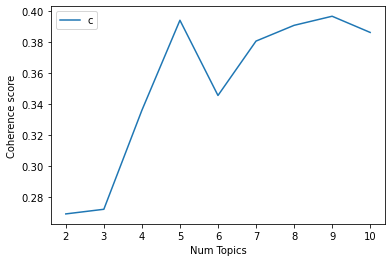

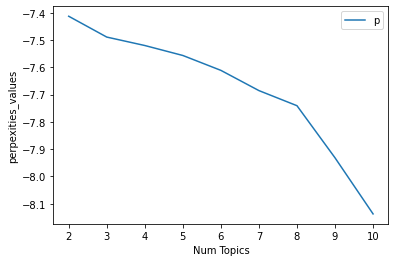

In [16]:
# -*- coding: utf-8 -*-
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

coherence_values = []
perpexities_values = []
model_list = []


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perpexities_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perpexities_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 11;
    start = 2;
    step = 1;

    model_list, coherence_values, perpexities_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
    x = range(start, limit, step)
    plt.plot(x, perpexities_values)
    plt.xlabel("Num Topics")
    plt.ylabel("perpexities_values")
    plt.legend(("perpexities_values"), loc='best')
    plt.show()

if __name__ == '__main__':
    
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    #최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)

In [17]:
j=0
for i in range(len(coherence_values)):
    print(j+2," coherence_value: ",coherence_values[i])
    print(j+2, " perpexities_values: ", perpexities_values[i])
    j+=1

2  coherence_value:  0.2690563506054858
2  perpexities_values:  -7.412468089631719
3  coherence_value:  0.27204867100021746
3  perpexities_values:  -7.488859174001777
4  coherence_value:  0.33589636192779493
4  perpexities_values:  -7.5198072894656045
5  coherence_value:  0.393973681101621
5  perpexities_values:  -7.556370269521297
6  coherence_value:  0.34546069733288065
6  perpexities_values:  -7.610968217230962
7  coherence_value:  0.3805385295017749
7  perpexities_values:  -7.685177881085269
8  coherence_value:  0.3906925668766468
8  perpexities_values:  -7.7405882092654945
9  coherence_value:  0.39656206526118115
9  perpexities_values:  -7.931725680895033
10  coherence_value:  0.3861225177504283
10  perpexities_values:  -8.137491097092648


In [23]:
num_topics = 5

temp = dictionary[0]
id2word = dictionary.id2token

model = model_list[num_topics-2]

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2022-08-29 21:55:04,636 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-08-29 21:55:04,639 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2022-08-29 21:55:04,641 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2022-08-29 21:55:04,643 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2022-08-29 21:55:04,645 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2022-08-29 21:55:04,647 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2022-08-29 21:55:04,649 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2022-08-29 21:55:04,651 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2022-08-29 21:55:04,654 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2022-08-29 21:55:04,656 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2022-08-29 21:55:04,658 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2022-08-29 21:55:04

2022-08-29 21:55:04,839 : INFO : CorpusAccumulator accumulated stats from 93000 documents
2022-08-29 21:55:04,841 : INFO : CorpusAccumulator accumulated stats from 94000 documents
2022-08-29 21:55:04,843 : INFO : CorpusAccumulator accumulated stats from 95000 documents
2022-08-29 21:55:04,845 : INFO : CorpusAccumulator accumulated stats from 96000 documents
2022-08-29 21:55:04,847 : INFO : CorpusAccumulator accumulated stats from 97000 documents
2022-08-29 21:55:04,849 : INFO : CorpusAccumulator accumulated stats from 98000 documents
2022-08-29 21:55:04,851 : INFO : CorpusAccumulator accumulated stats from 99000 documents
2022-08-29 21:55:04,853 : INFO : CorpusAccumulator accumulated stats from 100000 documents
2022-08-29 21:55:04,855 : INFO : CorpusAccumulator accumulated stats from 101000 documents
2022-08-29 21:55:04,857 : INFO : CorpusAccumulator accumulated stats from 102000 documents
2022-08-29 21:55:04,859 : INFO : CorpusAccumulator accumulated stats from 103000 documents
2022-0

Average topic coherence: -5.1984.
[([(0.08995944, '영어'),
   (0.047877457, '한국어'),
   (0.04486865, '사람'),
   (0.041656245, '제작자'),
   (0.029516501, '한글'),
   (0.020964798, '입양'),
   (0.017807052, '욕'),
   (0.014949427, '핵'),
   (0.0137505075, '말'),
   (0.013172578, '자동차'),
   (0.011816194, '번역'),
   (0.010899168, '신고'),
   (0.010675208, '가입'),
   (0.009827801, '사기'),
   (0.009741165, '한국'),
   (0.009675905, '별'),
   (0.009615063, '초딩'),
   (0.008574917, '알'),
   (0.008279043, '외국인'),
   (0.008080136, '채팅')],
  -3.860950149150504),
 ([(0.10883871, '렉'),
   (0.06307853, '컴퓨터'),
   (0.052596364, '로그인'),
   (0.036357567, '랙'),
   (0.02927936, '모바일'),
   (0.024941845, '핸드폰'),
   (0.024230476, '버그'),
   (0.022620086, '화면'),
   (0.017121289, '운전'),
   (0.015853116, '컴'),
   (0.015236901, '별'),
   (0.015051234, '오류'),
   (0.013790363, '컨트롤'),
   (0.0122001665, '수정'),
   (0.010798232, '휴대폰'),
   (0.010606065, '시작'),
   (0.009565952, '터치'),
   (0.008885796, '와이파이'),
   (0.008250115, '제작자'),
   (0

In [24]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [25]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.save_html(lda_visualization, 'output/roblox_topic_modeling_topic5_0828_2.html')